# Project: Food and Nutrition - Spring 2022
-----------------------------------------------
**OPIM 5512: Data Science Using Python - University of Connecticut**
The purpose of this project is to assess your skills on data wrangling and pre-processing, data wrangling, modeling, evaluation and technical communication. 

You will do this by exploring a comprehensive dataset on food items, their nutritional attributes, and how they are related to CHOLESTEROL. 

# Introduction (2.5 pts)

Read the following websites related to the dataset 
* https://corgis-edu.github.io/corgis/csv/food/
* https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/
* https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/FNDDS_2017_2018_factsheet.pdf

Write at least five sentences about you are doing in this notebook. You may want to write this at the very end after you complete your analysis. Add a nice picture or two take make your notebook look nice. 

List your group number and name of each project member.



**Notebook Objectives **:

1. This Dataset gives us information regarding the Nutritional contents in different food products. The target variable is Cholesterol and the independent variables are other nutrients such as minerals, fat, carbs , proteins etc. 

2. We extracted data from the website, did initial data exploration to understand rows and columns, explored the missing values , formatted the data types. 

3. We moved onto Literature review and EDA in which we read from various sources how cholesterol impacts humans and increase the risk of heart diseases. Given how cholesterol impacts human health , we decided to build different models to predict cholesterol in products. We explored the correlation and performed feature engineering between various independent and dependent variables throught heatmaps and scatterplots. 

4. After EDA, we moved onto splitting our dataset into training, test and validation in ratio of 80%, 10% and 10%. We further built Logistic regression and Linear Regression models.

5. Finally, we evaluated our models using various evaluation techniques to come up with the best model to predict cholesterol.




# Import Modules

In [ ]:
#import modules for EDA and data wrangling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import missingno as msno
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs



# regression error metrics for analyzing and interpreting erros

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# import other functions we'll need for classification modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Using ploynomial packages to raise the columns to the power of values
from sklearn.preprocessing import PolynomialFeatures

# Importing PCA from sklearn
from sklearn.decomposition import PCA


# Read Data from Website (2.5 pts)
* Read data from the website and print the shape
* Use Python to count how many nutrients there are (including cholesterol).

In [ ]:
# read the data
# note how we can read from the website if we want to! you can also read from your google drive
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head()       #displaying the top 5 records from the df dataset



,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [ ]:
# To check how many nutrients are there in datasset
nutrients = [i for i in df.columns if i.startswith('Data') ]
len(nutrients)

35

In [ ]:
# SO we Can see there are TOTAL 35 Nutrients in the data

In [ ]:
df.info()                         # checking the columns, their datatypes, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

# Removing the spaces in column names and replacing by underscore


In [ ]:
df.columns = df.columns.str.replace(' ', '_')   #Removing the spaces in column names and replacing by underscore
                          
df.columns                                      #Displaying the column names after renaming them

Index(['Category', 'Description', 'Nutrient_Data_Bank_Number',
       'Data.Alpha_Carotene', 'Data.Beta_Carotene', 'Data.Beta_Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein_and_Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar_Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated_Fat', 'Data.Fat.Polysaturated_Fat',
       'Data.Fat.Saturated_Fat', 'Data.Fat.Total_Lipid',
       'Data.Major_Minerals.Calcium', 'Data.Major_Minerals.Copper',
       'Data.Major_Minerals.Iron', 'Data.Major_Minerals.Magnesium',
       'Data.Major_Minerals.Phosphorus', 'Data.Major_Minerals.Potassium',
       'Data.Major_Minerals.Sodium', 'Data.Major_Minerals.Zinc',
       'Data.Vitamins.Vitamin_A_-_RAE', 'Data.Vitamins.Vitamin_B12',
       'Data.Vitamins.Vitamin_B6', 'Data.Vitamins.Vitamin_C',
       'Data.Vitamins.Vitamin_E', 'Data.Vitamins.

# Exploring each column and their values


In [ ]:
print(df.shape)                    # exploring the unique values in each column
df.nunique()

(7083, 38)


Category                          2429
Description                       7083
Nutrient_Data_Bank_Number         7083
Data.Alpha_Carotene                362
Data.Beta_Carotene                 871
Data.Beta_Cryptoxanthin            121
Data.Carbohydrate                 3113
Data.Cholesterol                   274
Data.Choline                      1108
Data.Fiber                         160
Data.Lutein_and_Zeaxanthin         735
Data.Lycopene                      677
Data.Niacin                       3317
Data.Protein                      2107
Data.Retinol                       374
Data.Riboflavin                    634
Data.Selenium                      539
Data.Sugar_Total                  1788
Data.Thiamin                       666
Data.Water                        3884
Data.Fat.Monosaturated_Fat        3623
Data.Fat.Polysaturated_Fat        3072
Data.Fat.Saturated_Fat            3474
Data.Fat.Total_Lipid              2100
Data.Major_Minerals.Calcium        407
Data.Major_Minerals.Coppe

We can see from above that there are 7083 rows in the dataset and the number of unique values in columns Description  and Nutrient_Data_Bank_Number IS 7083. So we can consider these 2 columns as the primary key identifer for the complete dataset
                     

# Exploring the target variable , Cholesterol

In [ ]:
df["Data.Cholesterol"].unique()                       #exoloring the values in our target variable Cholesterol

array([  14,    8,   12,    5,    2,    3,    4,   11,   15,   29,   34,
          0,    6,   10,   13,   16,   17,    7,   59,   20,   23,    1,
         97,   22,   35,  113,  106,    9,   50,   49,   24,   40,   42,
         44,   38,   30,   27,   28,   92,   60,   26,   41,   33,   32,
         25,   21,   36,   18,   55,   73,  102,  120,   63,  123,   91,
         75,   94,   72,  100,   76,   95,   89,  116,   79,  114,  110,
         90,   65,   54,   96,   87,   69,   93,   62,  105,   31,  101,
         98,   78,   53,   71,   39,   45,   68,   61,  144,   52,   43,
         46,   66,   57,   56,   70,   81,  124,  130,  129,  119,   86,
         82,   77,   48,   51,   84,   83,   67,   74,   58,   99,   80,
        109,   88,   85, 1064,  117,  112,  133,  122,  128,  115,  136,
        139,  131,  135,  134,  149,  155,  126,  103,  104,  127,  132,
        138,  140,  118,  137,  107,  125,  108,  153,  393,  378,  558,
        392,  391,  210,  710,  347, 3074,  275,  3

# Random Sampling (2.5 pts)
Take a random sample according to your Group Number (as given in HuskyCT).

* Shuffle the dataframe with a random seed equal to your group number, and then take a random sample of 90% of the original data without replacement (using your group number the random seed).

In [ ]:
# Here i will use sklearn to shuffle the values within datsets and i will then take a sample  of 90%

df_shuff = shuffle(df,random_state=18)                 
df_shuff = df.sample( frac=0.9, replace=False, weights=None, random_state=18, axis=None, ignore_index=False)

In [ ]:
# I have to make sure if the newly created datset has same number of columns as df so i will use she function to check
df_shuff.shape

(6375, 38)

So Newly created dataframe has same number of columns and the number of rows is 90% of main dataframe

# Missing Values (5 pts)
Show two different ways of checking for missing values per column (you can use `.info` as one of them.) If there are missing values, impute them and provide motivation for why you are imputing. If there are no missing values, move on.

In [ ]:
#Method 1 is using info function which shows us how many non null values are there in the dataset columnwise
df_shuff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 4974 to 6578
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient_Data_Bank_Number       6375 non-null   int64  
 3   Data.Alpha_Carotene             6375 non-null   int64  
 4   Data.Beta_Carotene              6375 non-null   int64  
 5   Data.Beta_Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein_and_Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                    

So looking at this we can conclude that there are no missing values,as the number of non null rows in each columns is same as the total number of values(rows)


In [ ]:
# Method 2 is checking the total sum of null values present in each column using is null function in pandas
df_shuff.isna().sum(axis = 0)

Category                          0
Description                       0
Nutrient_Data_Bank_Number         0
Data.Alpha_Carotene               0
Data.Beta_Carotene                0
Data.Beta_Cryptoxanthin           0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Choline                      0
Data.Fiber                        0
Data.Lutein_and_Zeaxanthin        0
Data.Lycopene                     0
Data.Niacin                       0
Data.Protein                      0
Data.Retinol                      0
Data.Riboflavin                   0
Data.Selenium                     0
Data.Sugar_Total                  0
Data.Thiamin                      0
Data.Water                        0
Data.Fat.Monosaturated_Fat        0
Data.Fat.Polysaturated_Fat        0
Data.Fat.Saturated_Fat            0
Data.Fat.Total_Lipid              0
Data.Major_Minerals.Calcium       0
Data.Major_Minerals.Copper        0
Data.Major_Minerals.Iron          0
Data.Major_Minerals.Magnesiu

So even here we can see that there are no null values present in any columns


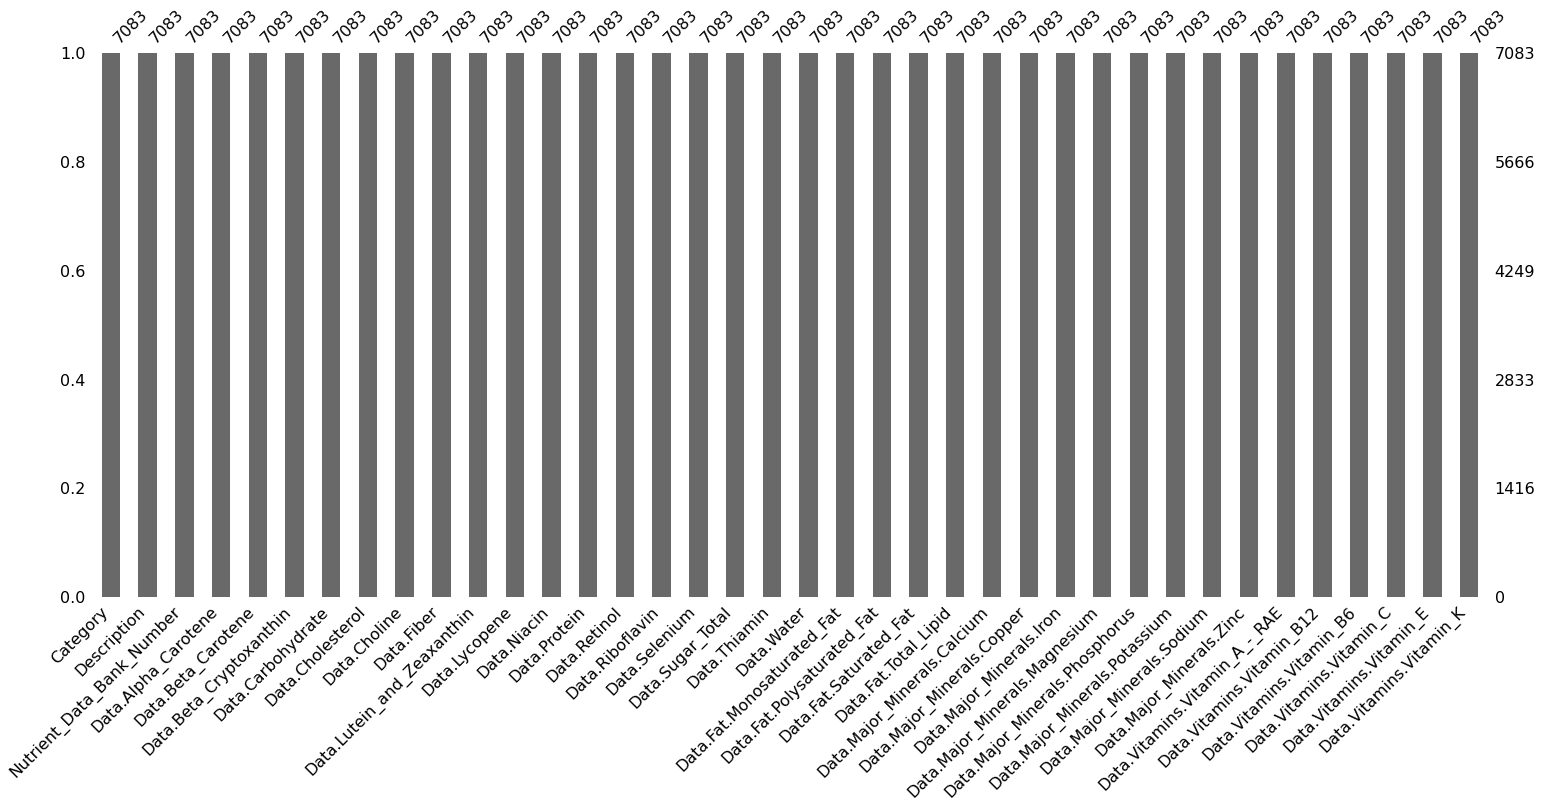

In [ ]:
# Method 3
# We can see the distribution of the null values by using different plotting techniques as below
missing_Values = df_shuff.isnull().sum()

%matplotlib inline
# PLOT 1 showing number of values present in each column as bar charts
msno.bar(df)

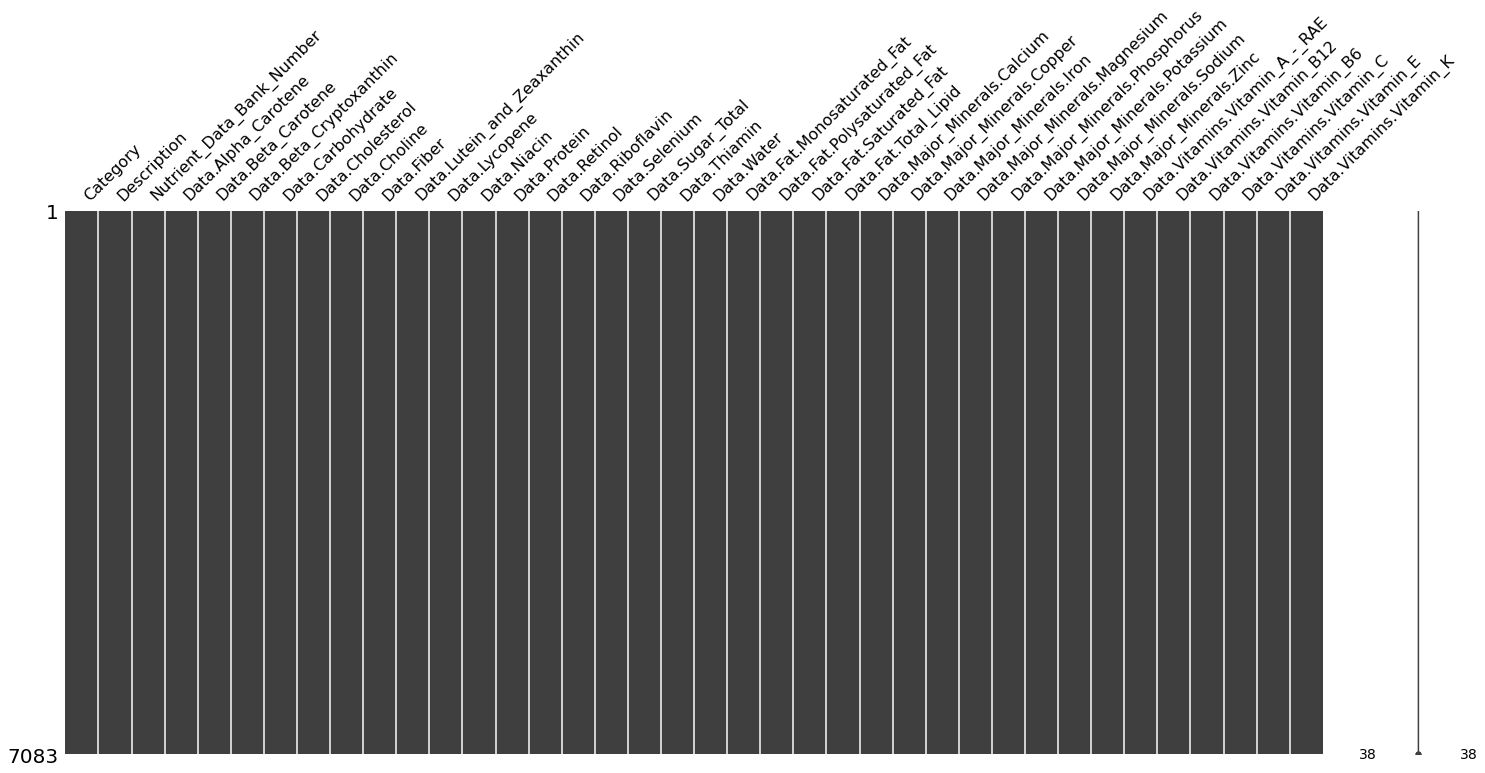

In [ ]:
# PLOT 2 showing if there are any missing values using matrix charts(if there are any missing values it shows balnks otherwise it is continous)
msno.matrix(df)

# Literature Review and Basic EDA (23 pts)



## Lit review (10 pts)
There is wonderful information on each of the nutrients here:
* https://corgis-edu.github.io/corgis/csv/food/

Tell a story about different food products and their cholesterol values - what do they have in common? What foods are high in cholesterol? Which nutrients are most correlated with cholesterol? Back your analysis up with at least 10 citations - cite them inline [1] and also as a list below so we know where you got the source.

**Citations**
1. "How to Calculate Net Carbs for Keto in 2 Simple Steps" (https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps)


# Citation 1

https://www.ucsfhealth.org/education/cholesterol-content-of-foods

#Insights

Cholesterol is only found in animal products. Fruits, vegetables, grains and all other plant foods do not have any cholesterol at all.

If you have risk factors for heart disease, you should not consume more than 200 milligrams of cholesterol a day.

If you do not have risk factors for heart disease, you should limit your cholesterol intake to no more than 300 milligrams a day.

So based on this we can categorise our Cholesterol variable into high risk and low risk cholesterol taking a cutoff value of 250

# Citation 2

https://medalerthelp.org/blog/cholesterol-calculator/
# Insights
There are two types of Cholesterol, **HDL** **(High-Density Lipoproteins)** and **LDL** **(Low-Density Lipoproteins)** Cholesterol. 

It is classified based on lipid to protein ration.

*   **LDL** contains more cholesterol and less protein which increases the risk of heart disease and hence called bad cholesterol. 


*   **HDL** contains more protein and less cholesterol. It is popularly known as good cholesterol

Based on this we can categorise our food products.


# Citation 3
https://pubmed.ncbi.nlm.nih.gov/34612076/

# Insights

Machine learning models like XGBoost and random forests can be used to predict LDL-C with more accuracy comparing to conventional linear regression LDL-C formulas.

# Citation 4
https://extension.okstate.edu/fact-sheets/dietary-fat-and-cholesterol.html?Forwarded=pods.dasnr.okstate.edu/docushare/dsweb/Get/Document-2388/T-3153web.pdf


# Insights

Consume less than 10 percent of calories from saturated fatty acids and less than 300 mg/day of cholesterol, and keep trans fatty acid consumption as low as possible.

Keep total fat intake between 20 to 35 percent of calories, with most fats coming from sources of polyunsaturated and monounsaturated fatty acids, such as fish, nuts, and vegetable oils.

When selecting and preparing meat, poultry, dry beans, and milk or dairy products, make choices that are lean, low-fat, or fat-free.

Limit intake of fats and oils high in saturated and/or trans fatty acids, and choose products low in such fats and oils.


# Citation 5

https://www.cdc.gov/nchs/products/databriefs/db228.htm

# insights

One in five youths had high total cholesterol, low high-density lipoprotein (HDL) cholesterol, or high non-HDL cholesterol.

Prevalence of low HDL cholesterol (13.4%) was greater than high non-HDL cholesterol (8.4%) or high total cholesterol (7.4%).

Prevalence of high total cholesterol, low HDL cholesterol, and high non-HDL cholesterol was greater in adolescents than children.

Girls had higher prevalence than boys for high total cholesterol and high non-HDL cholesterol, but lower prevalence for low HDL cholesterol.

Youth with obesity had greater prevalence of high total cholesterol, low HDL cholesterol, and high non-HDL cholesterol than youth of normal weight.



# Citation 6
https://www.myfooddata.com/articles/foods-highest-in-cholesterol.php
# Insights


Cholesterol is a steroid lipid (fat) present in the blood, necessary for the proper functioning of cell membranes and the production of vitamin D and certain hormones.

It gives the top 10 foods rich in cholesterol



In [ ]:
print(df_shuff.groupby('Category')['Data.Cholesterol'].mean().nlargest(10) )

# We can see that some products from our dataset which have highest cholesterol such as Shrimp-egg patty, Chicken liver, Quail Egg, Duck egg also appear in the link.
 

Category
Brains               3074.0
Breaded brains       1691.0
Goat head            1064.0
Quail egg             841.0
Duck egg              828.0
Kidney                710.0
Shrimp-egg patty      495.0
Chicken liver         475.0
Roe                   473.0
Hollandaise sauce     454.0
Name: Data.Cholesterol, dtype: float64


# Citation 7

https://www.health.harvard.edu/heart-health/11-foods-that-lower-cholesterol

# Insights

It gives the food list that lowers the cholesterol levels

<img src="http://content.health.harvard.edu/wp-content/uploads/2021/08/11912c1a-1167-4d51-85ad-a15a62babbca.jpg">

# Citation 8

https://www.progressivehealth.com/try-these-vitamins-if-you-have-high-cholesterol.htm#:~:text=The%20other%20B%20vitamins%20that%20can%20help%20cholesterol,triglycerides.%20Instead%2C%20they%20protect%20lipoprotein%20cholesterol%20from%20oxidation.
#Insights

B vitamins that can help cholesterol are vitamins B6 (pyridoxine), B9 (folic acid) and B12 (cyanocobalamin).

These B vitamins are also important to general health but unlike niacin, they do not affect the levels of total cholesterol, lipoprotein cholesterol or triglycerides. Instead, they protect lipoprotein cholesterol from oxidation.




# Citation 9
https://www.etoolsage.com/Chart/Food_Diet.asp?Cate=0&Chk606=606&SN606=5&SR606=%3C%3D&Amount606=2&Chk601=601&SN601=7&SR601=%3C%3D&Amount601=20&Chk303=303&SN303=16&SR303=%3E%3D&Amount303=8&pageNo=1
# Insights

It gives a list of food products which are high in iron but low in cholesterol which means for some food products there is an inverse relationship between iron and cholesterol

In [ ]:
df_shuff[['Data.Cholesterol','Data.Major_Minerals.Iron']].corr()

# Our data also shows that there is an inverse relationship between iron and cholesterol


,Data.Cholesterol,Data.Major_Minerals.Iron
Data.Cholesterol,1.000000,-0.014777
Data.Major_Minerals.Iron,-0.014777,1.000000


# Citation 10

https://dash.harvard.edu/handle/1/11563337
#Insights 

Tested several alternative models to predict future cholesterol levels from the pattern of previous measured values, using receiver-operating characteristic (ROC) curves to summarize the sensitivity and specificity of the resulting rules for predicting high risk values. One method was based on the Gaussian assumption that the logarithms of cholesterol levels are jointly Gaussian; a second was based on ordinary least squares regression; a third was based on logistic regression. We developed a bootstrap technique for finding confidence regions for points on the ROC curves.

## Unique values from `Category` (3 pts, 1 pt each)
* Count how many unique values are in `df['Category']`
* Make a frequency table of how many entries exist per `df['Category']`. Which categories are most common?
* Make a histogram from the frequency table you just calculated. Don't be afraid to play with x and y limits, and make sure you have nice titles and labels.

In [ ]:
df_shuff['Category'].nunique()                   # Calculating the number of unique values in Category column

2254

In [ ]:
frequency=df_shuff['Category'].value_counts()              # Calculating the frequency of each category in the category column
frequency

Infant formula                          152
Rice                                    133
Bread                                   106
Potato                                   98
Cookie                                   92
                                       ... 
Baklava                                   1
Cereal (General Mills Chex Wheat)         1
Cereal (General Mills Chex Cinnamon)      1
Chicken fillet biscuit                    1
Cassava                                   1
Name: Category, Length: 2254, dtype: int64

Infant formula, Rice, Bread, Potato and Cookie are top 5 in terms of frequency. So they are the most common categories

<function matplotlib.pyplot.show>

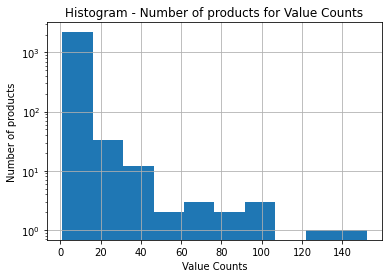

In [ ]:

plt.hist(frequency, align='mid', bins=10)          #plotting the histogram with matplotlib and making the bins of size 10
plt.grid()
plt.yscale('log')                                  # Converting the scale of y axis to log scale so all the product counts can fit in
plt.title ('Histogram - Number of products for Value Counts')                            # Giving a title to the plot
plt.xlabel('Value Counts')                         # Labelling the x-axis
plt.ylabel('Number of products')                   # Labelling the y-axis

plt.show                                           # Displaying the plot

## Correlation (5 pts, 1 pt each)
Try making different correlation matrices - when you have more than 10 variables it can be hard to read, so let's start big and then simplify. 

* make one for the entire dataset (this one should be hard to read)
* make four more correlation matrices that only contain:
  * fat-related
  * major minerals-related
  * vitamins-related
  * none of the above ('Alpha Carotene' through and including 'Water')

Describe what you see. You are welcome to color-code these plots so they are easy to read.

**Correlation matrix - Entire Dataset**

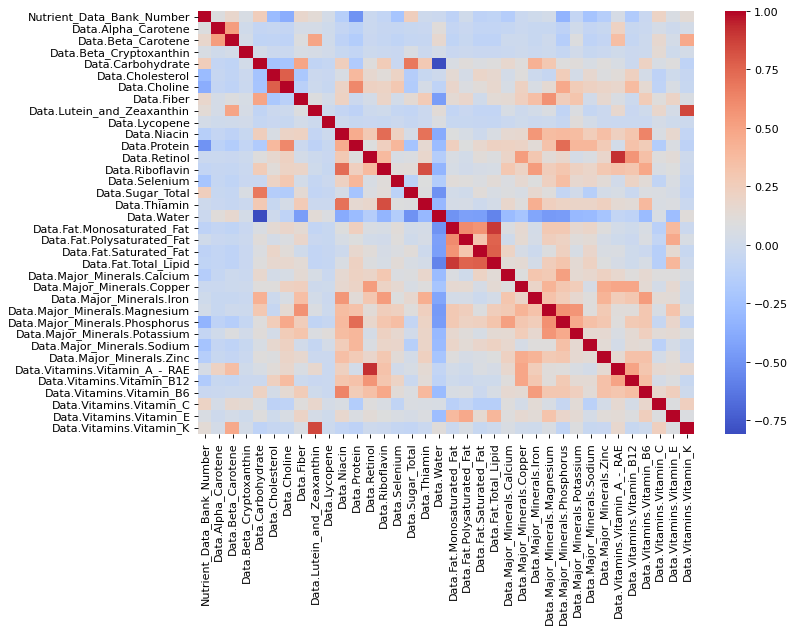

,Nutrient_Data_Bank_Number,Data.Alpha_Carotene,Data.Beta_Carotene,Data.Beta_Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein_and_Zeaxanthin,Data.Lycopene,...,Data.Major_Minerals.Phosphorus,Data.Major_Minerals.Potassium,Data.Major_Minerals.Sodium,Data.Major_Minerals.Zinc,Data.Vitamins.Vitamin_A_-_RAE,Data.Vitamins.Vitamin_B12,Data.Vitamins.Vitamin_B6,Data.Vitamins.Vitamin_C,Data.Vitamins.Vitamin_E,Data.Vitamins.Vitamin_K
Nutrient_Data_Bank_Number,1.000000,0.085627,0.174880,0.055240,0.251826,-0.286015,-0.368080,0.178815,0.134639,0.025669,...,-0.334610,-0.065509,-0.229447,-0.138708,0.040243,-0.168331,-0.035892,0.210301,0.063963,0.137110
Data.Alpha_Carotene,0.085627,1.000000,0.526819,0.008224,-0.060728,-0.052858,-0.065230,0.037209,0.034125,0.003445,...,-0.095871,0.004185,-0.065369,-0.040187,0.216155,-0.040954,-0.027983,0.037946,-0.010258,0.024929
Data.Beta_Carotene,0.174880,0.526819,1.000000,0.031433,-0.086882,-0.077661,-0.088546,0.086909,0.492498,0.004698,...,-0.141884,0.083410,-0.093348,-0.064036,0.362937,-0.058999,-0.013159,0.163179,0.031248,0.474350
Data.Beta_Cryptoxanthin,0.055240,0.008224,0.031433,1.000000,0.017930,-0.020388,-0.028611,0.049636,0.043495,0.014903,...,-0.058897,0.015551,-0.041210,-0.028819,0.006629,-0.024391,-0.015218,0.143447,0.001293,0.031478
Data.Carbohydrate,0.251826,-0.060728,-0.086882,0.017930,1.000000,-0.223159,-0.220419,0.492689,-0.077418,-0.055954,...,0.098538,0.115758,0.054373,0.107433,0.056322,-0.018658,0.216452,0.055005,0.097560,-0.094248
Data.Cholesterol,-0.286015,-0.052858,-0.077661,-0.020388,-0.223159,1.000000,0.776200,-0.201313,-0.021648,-0.038166,...,0.264679,0.030632,0.159781,0.084896,0.118932,0.230648,0.031383,-0.100123,-0.001495,-0.052173
Data.Choline,-0.368080,-0.065230,-0.088546,-0.028611,-0.220419,0.776200,1.000000,-0.122751,-0.015941,-0.041824,...,0.474547,0.265323,0.223434,0.200880,0.177644,0.374915,0.145237,-0.091985,0.053110,-0.042838
Data.Fiber,0.178815,0.037209,0.086909,0.049636,0.492689,-0.201313,-0.122751,1.000000,0.085841,0.024437,...,0.254357,0.316135,0.014459,0.162273,0.061248,-0.016702,0.268668,0.104747,0.208210,0.064444
Data.Lutein_and_Zeaxanthin,0.134639,0.034125,0.492498,0.043495,-0.077418,-0.021648,-0.015941,0.085841,1.000000,-0.014151,...,-0.077706,0.075260,-0.058706,-0.021310,0.170387,-0.038132,-0.000280,0.175447,0.032896,0.853781
Data.Lycopene,0.025669,0.003445,0.004698,0.014903,-0.055954,-0.038166,-0.041824,0.024437,-0.014151,1.000000,...,-0.048614,0.114268,0.030003,-0.023530,-0.031047,-0.029715,-0.031783,0.038429,-0.002765,-0.017485


In [ ]:

plt.figure(figsize=(10,7), dpi= 80)
sns.heatmap(df_shuff.corr(), annot = False, fmt='.5g',cmap= 'coolwarm')          # plotting a correlation matrix using seaborn for all variables
plt.show()                                                                       # Displaying the plot
df_shuff.corr()                                                                  # Displaying the correlation table for the values

**Correlation matrix - fat-related**

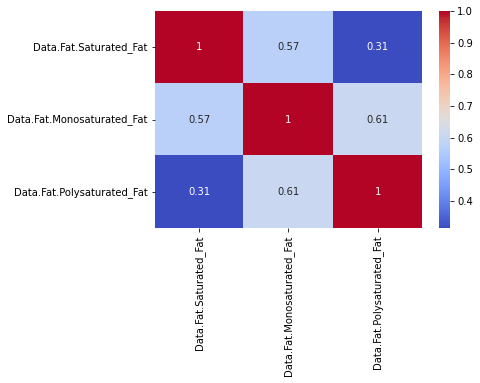

In [ ]:

fat_corr=df_shuff[['Data.Fat.Saturated_Fat','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat']]
sns.heatmap(fat_corr.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')            # Plotting a heatmap using seaborn using Fat related variables 
plt.show()                                                                        # Displaying the plot

Monosaturated Fat is having a positive strong correlation with Polysaturated Fat and Saturated Fat. 

Saturated Fat is having a weak positive correlation with Polysaturated Fat



**Correlation matrox - minerals-related**

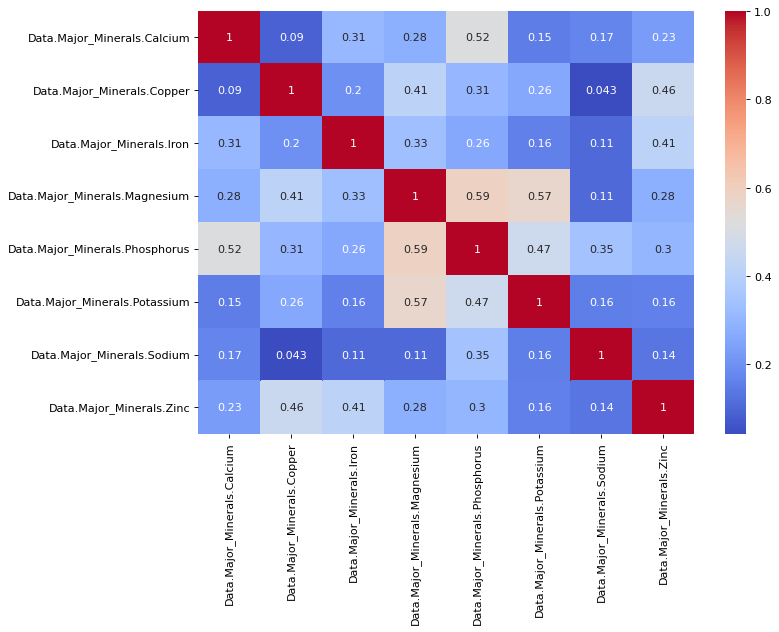

In [ ]:
min_corr=df_shuff[['Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Magnesium','Data.Major_Minerals.Phosphorus','Data.Major_Minerals.Potassium', 'Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc']]
plt.figure(figsize=(10,7), dpi= 80)
sns.heatmap(min_corr.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')            # Plotting a heatmap using seaborn using minerals related variables 

Magnesium and Phosphorus have strong positive correlation (0.59)

Magnesium had strong positive correlation with Potassium too (0.57)

Calcium and Phosphorus are positively correlated by a factor of 0.52

Copper and Zinc have decent positive correlation (0.46)

Sodium and Copper have a weak positive correlation (0.043)

Correlation matrix vitamins-related

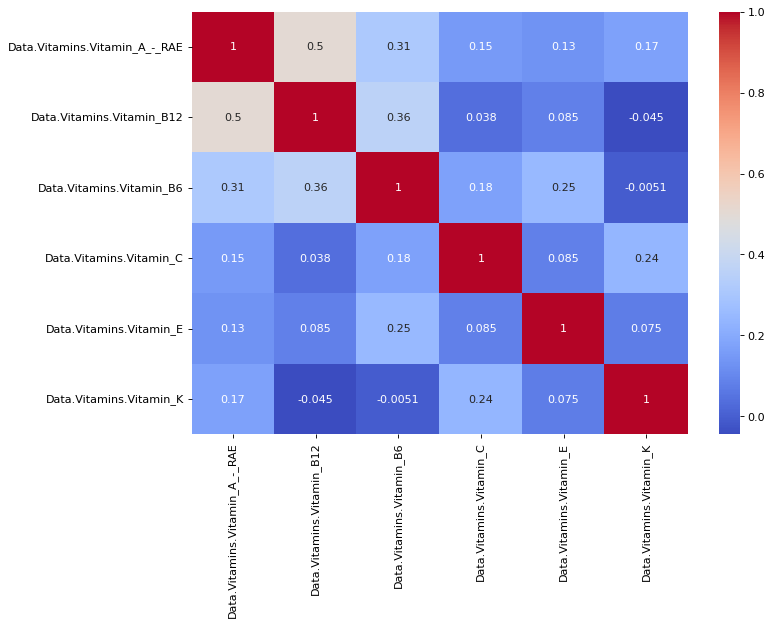

In [ ]:

vitamin_corr=df_shuff[['Data.Vitamins.Vitamin_A_-_RAE', 'Data.Vitamins.Vitamin_B12',
       'Data.Vitamins.Vitamin_B6', 'Data.Vitamins.Vitamin_C',
       'Data.Vitamins.Vitamin_E', 'Data.Vitamins.Vitamin_K']]
plt.figure(figsize=(10,7), dpi= 80)                                                 # Defining the size of the plot
sns.heatmap(vitamin_corr.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')          # Plotting a heatmap using seaborn using vitamins related variables 
plt.show()                                                                          #Displaying the plot

Interestingly, there are negative correlations along with positive observed in vitamins.

Vitamin B12 and Vitamin K have negative correlation.

Vitamin B12 and Vitamin B6 are positively correlated.

Correlation matrix ( Alpha Carotene through and including Water)

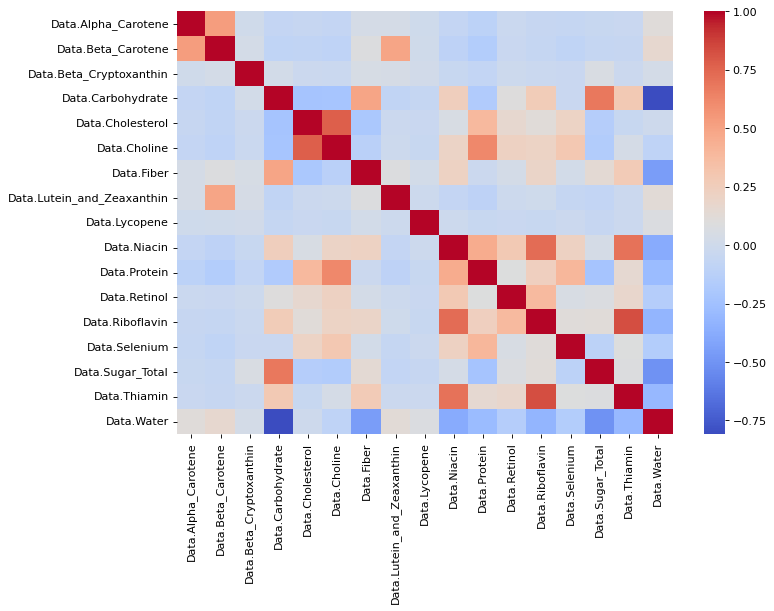

In [ ]:
others_corr=df_shuff[['Data.Alpha_Carotene', 'Data.Beta_Carotene', 'Data.Beta_Cryptoxanthin',    # Keeping columns in one a list for whom correlation need to be calculated
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein_and_Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar_Total', 'Data.Thiamin', 'Data.Water']]
plt.figure(figsize=(10,7), dpi= 80)                                                # Defined size to make the plot neat and big
sns.heatmap(others_corr.corr(), annot = False, fmt='.2g',cmap= 'coolwarm')         # Making the correlation heatmap, putting annotation false to make it look clear through colors
plt.show()                                                                         # Displaying the plot

By the colors in the above correlation matrix, I can see that there are a lot of strong positive relationships and few negative too.

Riboflavin have strong positive correlation with Thiamin (0.83) and Niacin (0.73)

Carbohydrate and Sugar total have strong positive correlation (0.69)

Water and Carbohydrate have a strong negative correlation (-0.81)


## Feature Engineering: Net Carbs (5 pts)
Read this article.
* https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps

* Calculate a new feature called `NetCarbs`. (1 pt)
* Is there any relationship between net carbs and cholesterol? Use a plot or table to prove your point. (2 pt)
* Which foods have the lowest net carbs? Which foods have the highest net carbs? What do these foods have in common. (2 pt) 

Support your answer with analysis completed in Python, not just lit review.

In [ ]:
df_shuff['NetCarbs'] = df_shuff['Data.Carbohydrate'] - df_shuff['Data.Fiber'] # Calculated new column by subtracting fiber from carbohydrate
df_shuff['NetCarbs'] 

4974    19.71
4635    13.57
2611     7.76
1900    15.55
1176     2.85
        ...  
2766     1.40
3920    68.36
5526    13.58
5560    37.72
6578    37.15
Name: NetCarbs, Length: 6375, dtype: float64

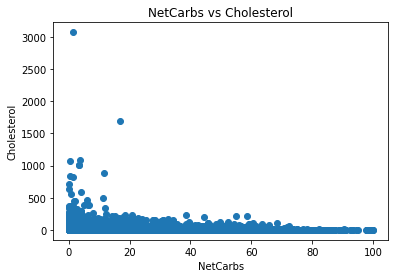

In [ ]:

plt.scatter(df_shuff['NetCarbs'], df_shuff['Data.Cholesterol']) # plotting a scatterplot with NetCarbs on x-axis and Cholesterol on y-axis
plt.xlabel('NetCarbs')                                          # Labelling the x-axis
plt.ylabel('Cholesterol')                                       #Labelling the y-axis
plt.title('NetCarbs vs Cholesterol')                            # Providing the title to the plot
plt.show()                                                      # Displaying the plot



In [ ]:
print(df_shuff[['NetCarbs','Data.Cholesterol']].corr())                 # Calculating the correlation beyween NetCarbs and Cholesterol

                  NetCarbs  Data.Cholesterol
NetCarbs          1.000000         -0.210976
Data.Cholesterol -0.210976          1.000000


By above scatter plot and  correlation  matrix we can see that as NetCarbs are increasing, Cholesterol is decreasing. Hence, they are negatively correlated. The slope is not too much steep which means that they are weekly correlated.

In [ ]:
 print(df_shuff.groupby('Category')['NetCarbs'].mean().nlargest(20) )
 print(df_shuff.groupby('Category')['NetCarbs'].mean().nsmallest(20)  )

Category
Sugar                                     99.265000
Strawberry beverage powder                99.100000
Dietetic or low calorie hard candy        98.600000
Dietetic or low calorie mints             98.600000
Candy                                     98.000000
Hard candy                                98.000000
Licorice                                  93.350000
Chewing gum                               93.223333
Gumdrops                                  92.820000
Skittles                                  90.780000
Butterscotch hard candy                   90.400000
Tamarind candy                            89.460000
Cereal (Malt-O-Meal Fruity Dyno-Bites)    89.100000
Cereal (Malt-O-Meal Frosted Flakes)       89.000000
Cereal (Kellogg's Frosted Flakes)         87.000000
Cereal (Malt-O-Meal Cocoa Dyno-Bites)     86.830000
Yogurt covered fruit snacks candy         86.700000
Fruit flavored snack                      86.680000
Cereal (Kellogg's Cocoa Krispies)         86.500000
Cer

In [ ]:
df_shuff[df_shuff['Category'].isin(['Fish stock','Flaxseed oil','Candy','Sugar'])] # Taking top 2 and bottom 2 food products wrt Net Carbs and observing all other columns 


,Category,Description,Nutrient_Data_Bank_Number,Data.Alpha_Carotene,Data.Beta_Carotene,Data.Beta_Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major_Minerals.Potassium,Data.Major_Minerals.Sodium,Data.Major_Minerals.Zinc,Data.Vitamins.Vitamin_A_-_RAE,Data.Vitamins.Vitamin_B12,Data.Vitamins.Vitamin_B6,Data.Vitamins.Vitamin_C,Data.Vitamins.Vitamin_E,Data.Vitamins.Vitamin_K,NetCarbs
6492,Candy,"Candy, NFS",91700010,0,0,0,98.00,0,0.0,0.0,...,5,38,0.01,0,0.00,0.003,0.0,0.00,0.0,98.00
6425,Sugar,"Sugar, brown",91102010,0,0,0,98.09,0,2.3,0.0,...,133,28,0.03,0,0.00,0.041,0.0,0.00,0.0,98.09
6424,Sugar,"Sugar, white, confectioner's, powdered",91101020,0,0,0,99.77,0,0.0,0.0,...,2,2,0.01,0,0.00,0.000,0.0,0.00,0.0,99.77
6423,Sugar,"Sugar, white, granulated or lump",91101010,0,0,0,99.60,0,0.0,0.0,...,2,1,0.01,0,0.00,0.000,0.0,0.00,0.0,99.60
6350,Flaxseed oil,Flaxseed oil,82103500,0,0,0,0.00,0,0.2,0.0,...,0,0,0.07,0,0.00,0.000,0.0,0.47,9.3,0.00
6422,Sugar,"Sugar, NFS",91101000,0,0,0,99.60,0,0.0,0.0,...,2,1,0.01,0,0.00,0.000,0.0,0.00,0.0,99.60
2635,Fish stock,"Fish stock, home recipe",28350040,0,0,0,0.00,1,7.0,0.0,...,144,156,0.06,2,0.69,0.037,0.1,0.17,0.0,0.00


It can be seen that for producst with high NetCarbs, Carbohydrate is too high while for products with 0 Net Carbs, Carbohydrates value is 0. Fiber value is 0 for all these products so Carbohydrates is directlt driving NetCarbs

# Advanced EDA (10 pts, 2 pts per item)
This is your chance to show-off your data analysis skills. Create a total of five compelling tables and visualizations (2 pts each) to show you understand how to make amazing plots and tables. You should have two or three tables and two or three visualizations.

Each item you create should have a nice sub-header, the figure or table, and then a nice caption which relates back to your theme of cholesterol. Don't just rattle of a bunch of plots for the sake of making plots - do a great job here. You can use your lit review to motivate the creation of these plots and tables.

## Advanced EDA Table 1


*   Exploring the nutritional contents of infant formula to see the distribution of essential and non-essential nutrients in formula for babies growth
 



In [ ]:
babies = df_shuff[df_shuff['Category'] == 'Infant formula']  # Selecting all rows corresponding to category 'infant formula'

babies.describe()  # Infant formulas have decent amount of essential nutrients for babies development.

,Nutrient_Data_Bank_Number,Data.Alpha_Carotene,Data.Beta_Carotene,Data.Beta_Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein_and_Zeaxanthin,Data.Lycopene,...,Data.Major_Minerals.Potassium,Data.Major_Minerals.Sodium,Data.Major_Minerals.Zinc,Data.Vitamins.Vitamin_A_-_RAE,Data.Vitamins.Vitamin_B12,Data.Vitamins.Vitamin_B6,Data.Vitamins.Vitamin_C,Data.Vitamins.Vitamin_E,Data.Vitamins.Vitamin_K,NetCarbs
count,1.520000e+02,152.0,152.0,152.0,152.000000,152.000000,152.000000,152.000000,152.0,152.0,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.00000
mean,1.171492e+07,0.0,0.0,0.0,7.237039,0.611842,15.399342,0.015789,0.0,0.0,...,76.355263,25.493421,0.628816,63.631579,0.220724,0.049559,7.467763,0.845789,5.750658,7.22125
std,7.960417e+03,0.0,0.0,0.0,0.860491,0.789411,3.130294,0.097726,0.0,0.0,...,12.736456,5.735906,0.138152,23.471466,0.070496,0.034555,1.593887,0.303715,1.596436,0.84081
min,1.171000e+07,0.0,0.0,0.0,6.600000,0.000000,7.900000,0.000000,0.0,0.0,...,64.000000,16.000000,0.480000,46.000000,0.160000,0.037000,5.700000,0.440000,0.000000,5.97000
25%,1.171063e+07,0.0,0.0,0.0,6.860000,0.000000,15.100000,0.000000,0.0,0.0,...,70.000000,21.000000,0.500000,58.000000,0.180000,0.039000,5.900000,0.600000,5.300000,6.86000
50%,1.171070e+07,0.0,0.0,0.0,7.120000,0.000000,15.700000,0.000000,0.0,0.0,...,72.000000,26.000000,0.600000,59.000000,0.200000,0.040000,7.750000,0.780000,5.650000,7.12000
75%,1.172032e+07,0.0,0.0,0.0,7.392500,1.000000,15.800000,0.000000,0.0,0.0,...,76.250000,29.000000,0.670000,60.000000,0.220000,0.040000,7.900000,0.907500,6.000000,7.39250
max,1.174052e+07,0.0,0.0,0.0,13.060000,2.000000,29.000000,0.700000,0.0,0.0,...,152.000000,52.000000,1.150000,250.000000,0.570000,0.248000,13.100000,1.860000,9.800000,13.06000


## Advanced EDA Table 2

### Exploring foods that are low on carbohydrate and high on cholesterol


*   Food low on carbohydrate are categorized as having Data.carbohydrate value <= 10.00
*  Food high on cholesterol are categorized as having Data.cholesterol value >= 400
* The goal is to explore the food category types that meet these criteria and their average carbohydrate and cholesterol value



In [ ]:
# Selecting all rows of food with low carbohydrate and high cholesterol using the described criteria above

c = df_shuff[(df_shuff['Data.Carbohydrate'] <= 20.00) & (df_shuff['Data.Cholesterol'] >= 400)]

# Table showing average carbohydrate and cholesterol value by food category where carb is low and cholesterol is high

table2 = c.groupby('Category')['Data.Carbohydrate','Data.Cholesterol'].mean()  
table2 

# As expected, these are food only from animal sources given the high Cholesterol content


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,Data.Carbohydrate,Data.Cholesterol
Category,,
Brains,1.470000,3074.000000
Breaded brains,17.350000,1691.000000
Chicken liver,0.860000,558.000000
Duck egg,1.360000,828.000000
Egg,3.436667,1038.333333
Goat head,0.480000,1064.000000
Hollandaise sauce,1.800000,454.000000
Kidney,0.000000,710.000000
Quail egg,0.410000,841.000000


## Advanced EDA Table 3

* Exploring the Minimum, Maximum and Average value of selected nutrients accross food category groups

In [ ]:
# Exploring for selected nutrients : Data.Cholesterol, Data.Protein, Data.Carbohydrate

cat_breakdown = df_shuff.groupby('Category')['Data.Carbohydrate', 'Data.Cholesterol', 'Data.Protein'].agg([np.mean, np.min, np.max])

cat_breakdown


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Data.Carbohydrate                \
                                            mean   amin   amax   
Category                                                         
100 GRAND Bar                          70.970000  70.97  70.97   
3 MUSKETEERS Bar                       77.770000  77.77  77.77   
3 Musketeers Truffle Crisp Bar         63.150000  63.15  63.15   
Abalone                                11.586667   7.26  15.53   
Adobo                                   8.520000   8.16   8.88   
...                                          ...    ...    ...   
Zombie                                  9.250000   9.25   9.25   
Zucchini                                7.440000   7.44   7.44   
Zucchini lasagna                       13.130000  13.13  13.13   
Zucchini soup                           2.730000   2.73   2.73   
Zwieback toast                         74.200000  74.20  74.20   

                               Data.Cholesterol           Data.Protein         \
                                           mean amin amax         mean   amin   
Category                                                                        
100 GRAND Bar                              12.0   12   12     2.500000   2.50   
3 MUSKETEERS Bar                            5.0    5    5     2.600000   2.60   
3 Musketeers Truffle Crisp Bar             18.0   18   18     6.410000   6.41   
Abalone                                   127.0  101  169    24.223333  18.24   
Adobo                                      73.5   72   75    17.285000  16.89   
...                                         ...  ...  ...          ...    ...   
Zombie                                      0.0    0    0     0.150000   0.15   
Zucchini                                    0.0    0    0     1.000000   1.00   
Zucchini lasagna                            9.0    9    9     5.420000   5.42   
Zucchini soup                               3.0    3    3     1.700000   1.70   
Zwieback toast                              8.0    8    8    10.100000  10.10   

                                       
                                 amax  
Category                               
100 GRAND Bar                    2.50  
3 MUSKETEERS Bar                 2.60  
3 Musketeers Truffle Crisp Bar   6.41  
Abalone                         34.05  
Adobo                           17.68  
...                               ...  
Zombie                           0.15  
Zucchini                         1.00  
Zucchini lasagna                 5.42  
Zucchini soup                    1.70  
Zwieback toast                  10.10  

[2254 rows x 9 columns]

## Advanced EDA plot 1: Scatter plot with:

*   Exploring two food categories (Egg and infant formula) to see the relationship between protein and cholesterol contents

*   This can help to see which is a better and bad source of said nutrient for babies as they grow with age



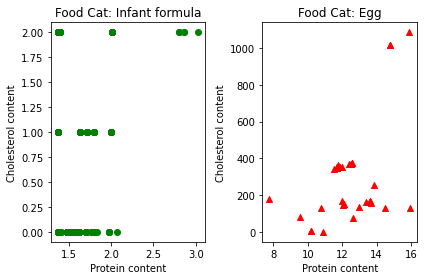

In [ ]:
# Extracting food with category "Egg"

cat_egg = df_shuff[df_shuff['Category'] == 'Egg']

cat_egg  # food with category: Egg


# Creating a figure object
fig = plt.figure()

# Creating axis subplot objects
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Creating scatterplot on left subplot object

ax1.scatter(babies['Data.Protein'], babies['Data.Cholesterol'], color = 'green')
ax1.set_xlabel('Protein content')
ax1.set_ylabel('Cholesterol content')
ax1.set_title('Food Cat: Infant formula')

# Creating scatterplot on right subplot object

ax2.scatter(cat_egg['Data.Protein'], cat_egg['Data.Cholesterol'], color = 'red', marker = '^')
ax2.set_xlabel('Protein content')
ax2.set_ylabel('Cholesterol content')
ax2.set_title('Food Cat: Egg')

plt.tight_layout()
plt.show()

## Advanced EDA Plot 2:

*  Bar graph of the average value of Cholesterol, Phosphorous and Potassium in classes of Abalone

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


<Figure size 1440x576 with 0 Axes>

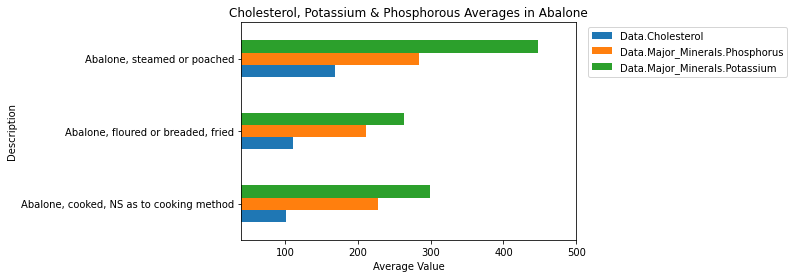

In [ ]:
# Selecting all rows of food categories labeled as 'Abalone'

a = df_shuff.loc[df_shuff['Category'] == 'Abalone'] 

# Exploring the average value of Cholesterol and select minerals (i.e phosphorous & potassium) in different types of Abalone

cpp = a.groupby('Description')['Data.Cholesterol', 'Data.Major_Minerals.Phosphorus', 'Data.Major_Minerals.Potassium'].mean()
cpp

# Bar graph representation of the average select nutrient by Abalone type


plt.figure(figsize=(20, 8))
ax = cpp.plot(kind='barh')
ax.set_title('Cholesterol, Potassium & Phosphorous Averages in Abalone')
ax.set_xlabel('Average Value')
ax.set_ylabel('Description')
ax.set_xlim(40, 500)
ax.legend(bbox_to_anchor= (1.02, 1))
plt.show()

# Floured or breaded Abalone has the least average amount of Phosphorous and Potassium (compared to its cholesterol value). Maybe not the best of all the 3 sources

# Data Splitting (2 pts)
Use an 80/10/10 split for train, test and validation. Use your group number as a random_seed so that you always will get the same modeling results.

How to get the test partition? Do a 50/50 split on the val partition and overwrite! 

Optional: You will likely want to make a copy of the metadata columns for each partition... you can call this X_train_meta, X_test_meta... just keep the first few columns of X_train and X_test.

In [ ]:
X=df_shuff[['Data.Alpha_Carotene','Data.Beta_Carotene','Data.Beta_Cryptoxanthin','Data.Carbohydrate','Data.Choline','Data.Fiber','Data.Lutein_and_Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin',
                       'Data.Selenium','Data.Sugar_Total','Data.Thiamin','Data.Water','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat','Data.Fat.Saturated_Fat',
                       'Data.Fat.Total_Lipid','Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Phosphorus',
                       'Data.Major_Minerals.Potassium','Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc','Data.Vitamins.Vitamin_A_-_RAE','Data.Vitamins.Vitamin_B12',
                       'Data.Vitamins.Vitamin_B6','Data.Vitamins.Vitamin_C','Data.Vitamins.Vitamin_E','Data.Vitamins.Vitamin_K','Data.Major_Minerals.Magnesium']]
#X = df_shuff.drop(columns = ['Data.Cholesterol','Category','Description','Nutrient_Data_Bank_Number']).copy()
Y=df_shuff['Data.Cholesterol']
#I will be creating a column with category and cholestrol level so that i can use it in analysis for linear regression
CAT=df_shuff['Category']
X = np.array(X)
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 18)

#X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8, random_state = 18)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
    test_size=0.5, random_state= 18)

#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)   

# for Category 

CAT_train, CAT_test = train_test_split(CAT,
    test_size=0.2, shuffle = True, random_state = 18)


CAT_test, CAT_val= train_test_split(CAT_test,
    test_size=0.5, random_state= 18)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,X_val.shape, y_val.shape)

(5100, 34) (637, 34) (5100,) (637,) (638, 34) (638,)


# Modeling (Regression) (10 pts)
Use subheaders to keep your notebook really organized!

Can you predict Cholesterol from the other nutrition variables?

1. Model1: Fit a very basic linear regression model (vanilla)
2. Model2: Show off! Use all of your pre-processing and advanced modeling techniques to build an amazing model. Polynomial features, interaction terms... other?
3. Model3: Same as (1), but drop any records where cholesterol is equal to 0. 
4. Model4: Same as (3), but drop any records where cholesterol is equal to 0.

**MODEL 1:**

In [ ]:
# the target variable is Y which we have already calculated
Y
# verify the shape of preictor
Y.shape


(6375,)

In [ ]:
# Our predictor variables are derived above as X
X.shape

(6375, 34)

In [ ]:
# So both dataframe has same number of rows , we can move to model now 
# converting all the values to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)


In [ ]:
# I will use min max scaler to fit the predictor variables to one scale it's basically transforming the predictor variables

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
# Fitting the model
# Creating a variable to store our model
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

#Storing the predictions
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test)
val_preds =LR.predict(X_val)

**MODEL 2: Polynomial Features**

In [ ]:
poly = PolynomialFeatures(2) # Using all the columns expect the one with categorical values
X1 = poly.fit_transform(X)

X1 = pd.DataFrame(X1)
print(X1.shape)



(6375, 630)


In [ ]:
# I will split data
X_train_poly,X_test_poly, y_train_poly, y_test_poly = train_test_split(X1,Y, train_size=0.8, random_state = 18)

X_val_poly, X_test_poly, y_val_poly, y_test_poly = train_test_split(X_test_poly,y_test_poly, test_size=0.5)

In [ ]:
# Checking the shape
print(X_train_poly.shape, X_test_poly.shape, y_train_poly.shape, y_test_poly.shape,X_val_poly.shape, y_val_poly.shape)

(5100, 630) (638, 630) (5100,) (638,) (637, 630) (637,)


In [ ]:
# converting all values to numpy arrays
X_train_poly = np.array(X_train_poly)
X_test_poly = np.array(X_test_poly)
X_val_poly = np.array(X_val_poly)
y_train_poly = np.array(y_train_poly)
y_test_poly = np.array(y_test_poly)
y_val_poly = np.array(y_val_poly)


In [ ]:
# scaling ourdatset
scaler = MinMaxScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)
X_val_poly =scaler.transform(X_val_poly)

In [ ]:
# I will do PCA to reduce the number of columns 

#I would like to retain 95% of the data 
pca = PCA(n_components = 0.95)               
X_train_pca = pca.fit_transform(X_train_poly)

In [ ]:
# Checking the number of columns after PCA
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape)
X_train_pca.head()
# So we have reduced the numbers to 19 columns and reatined 95 % of the data which is amazing..we did this so that our model is less complex

(5100, 76)


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.238920,0.173941,0.019307,-0.245552,-0.146663,-0.018892,0.290494,0.037979,-0.015178,-0.011710,...,-0.006212,-0.016925,0.007708,-0.009250,-0.004242,-0.011919,0.018977,0.004627,0.015117,0.015032
1,0.225902,-0.095609,-0.128489,-0.010016,-0.182931,0.254956,-0.057315,0.005615,0.042507,-0.057008,...,-0.007172,0.028362,-0.002208,-0.031892,0.023253,0.014422,-0.040966,-0.038981,0.006899,0.005233
2,-0.405925,0.140445,0.114233,0.133837,-0.015120,-0.042340,-0.051400,-0.144953,0.180309,0.414596,...,-0.023405,0.016278,0.029900,-0.009371,-0.033796,-0.032055,-0.068882,0.022306,0.018515,0.020652
3,0.023936,0.171846,-0.161695,-0.079969,-0.140658,0.082870,-0.064438,-0.039091,-0.033654,-0.001940,...,-0.018124,0.005580,0.001814,-0.024747,0.011553,0.001566,-0.011198,0.004083,-0.013112,0.003656
4,1.216689,-0.525011,0.489822,-0.379385,-0.051021,-0.301198,0.179349,-0.295952,-0.309498,0.028924,...,0.033369,0.094104,0.050798,-0.066174,-0.078901,-0.068041,0.029886,-0.013568,-0.048024,-0.013262


In [ ]:
# Applying PCA for Test and validation datsets
X_test_pca = pca.transform(X_test_poly)
X_val_pca = pca.transform(X_val_poly)


In [ ]:
X_test_pca.shape,X_val_pca.shape
# we can see the number of columns are consistent 

((638, 76), (637, 76))

Model without PCA 

In [ ]:
# Fitting the model
# Creating a variable to store our model
LR_2 = LinearRegression()
LR_2 = LR_2.fit(X_train_poly, y_train_poly)

In [ ]:
#Storing the predictions
train_preds_2 = LR_2.predict(X_train_poly) 
test_preds_2 = LR_2.predict(X_test_poly)
val_preds_2 =LR_2.predict(X_val_poly)

Model With PCA

In [ ]:
# Since target is same for polynomial analysis assigning it from PCA datframe
y_train_pca = y_train_poly

In [ ]:
# Fitting the model
# Creating a variable to store our model
LR_2_PCA = LinearRegression()
LR_2_PCA = LR_2.fit(X_train_pca, y_train_pca)

In [ ]:
#Storing the predictions
train_preds_2_pca = LR_2.predict(X_train_pca) 
test_preds_2_pca = LR_2.predict(X_test_pca)
val_preds_2_pca =LR_2.predict(X_val_pca)

**MODEL :3 drop values where cholestrol is 0**

In [ ]:
# So i will select records which don't have 0 values in our traget variables so that it won't screw our results by givig wrong answers
df_3 = df_shuff[df_shuff['Data.Cholesterol'] != 0]
df_3.shape
df_M3= df_3[['Data.Alpha_Carotene','Data.Beta_Carotene','Data.Beta_Cryptoxanthin','Data.Carbohydrate','Data.Choline','Data.Fiber','Data.Lutein_and_Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin',
                       'Data.Selenium','Data.Sugar_Total','Data.Thiamin','Data.Water','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat','Data.Fat.Saturated_Fat',
                       'Data.Fat.Total_Lipid','Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Phosphorus',
                       'Data.Major_Minerals.Potassium','Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc','Data.Vitamins.Vitamin_A_-_RAE','Data.Vitamins.Vitamin_B12',
                       'Data.Vitamins.Vitamin_B6','Data.Vitamins.Vitamin_C','Data.Vitamins.Vitamin_E','Data.Vitamins.Vitamin_K','Data.Major_Minerals.Magnesium']]

Y3=df_3['Data.Cholesterol']


In [ ]:
# Checking the datset shape after dropping 0 cholestrol values 
df_M3.shape

(4186, 34)

In [ ]:
# Splitting the data
X_train_3,X_test_3, y_train_3, y_test_3 = train_test_split(df_M3,Y3, train_size=0.8, random_state = 18)

X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_test_3,y_test_3, test_size=0.5)

In [ ]:
# converting all the values to numpy arrays
X_train_3 = np.array(X_train_3)
X_test_3 = np.array(X_test_3)
X_val_3 = np.array(X_val_3)
y_train_3 = np.array(y_train_3)
y_test_3 = np.array(y_test_3)
y_val_3 = np.array(y_val_3)

In [ ]:
# I will use min max scaler to fit the predictor variables to one scale it's basically transforming the predictor variables

scaler = MinMaxScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)
X_val_3 = scaler.transform(X_val_3)

In [ ]:
# Fitting the model
# Creating a variable to store our model
LR_3 = LinearRegression()
LR_3 = LR_3.fit(X_train_3, y_train_3)



In [ ]:
#Storing the predictions
train_preds_3 = LR_3.predict(X_train_3) 
test_preds_3 = LR_3.predict(X_test_3)
val_preds_3 =LR_3.predict(X_val_3)

**MODEL 4: Drop values where cholestrol is 0 with PCA**

In [ ]:
#So i will use the dataset in which 0 cholestrol was deleted from part and apply polynomial on that
df_M3.shape

(4186, 34)

In [ ]:
# Coverting to polynomial
poly = PolynomialFeatures(2) # Using all the columns expect the one with categorical values
X4 = poly.fit_transform(df_M3)

X4 = pd.DataFrame(X4)


Y4=Y3

print(X4.shape,Y4.shape)

(4186, 630) (4186,)


In [ ]:
# Splitting the data
X_train_4,X_test_4, y_train_4, y_test_4 = train_test_split(X4,Y4, train_size=0.8, random_state = 18)

X_val_4, X_test_4, y_val_4, y_test_4 = train_test_split(X_test_4,y_test_4, test_size=0.5)

In [ ]:
# converting all the values to numpy arrays
X_train_4 = np.array(X_train_4)
X_test_4 = np.array(X_test_4)
X_val_4 = np.array(X_val_4)
y_train_4 = np.array(y_train_4)
y_test_4 = np.array(y_test_4)
y_val_4 = np.array(y_val_4)

In [ ]:
# I will use min max scaler to fit the predictor variables to one scale it's basically transforming the predictor variables

scaler = MinMaxScaler()
X_train_4 = scaler.fit_transform(X_train_4)
X_test_4 = scaler.transform(X_test_4)
X_val_4 = scaler.transform(X_val_4)

In [ ]:
# Fitting the model
# Creating a variable to store our model
LR_4 = LinearRegression()
LR_4 = LR_4.fit(X_train_4, y_train_4)


In [ ]:
#Storing the predictions
train_preds_4 = LR_4.predict(X_train_4) 
test_preds_4 = LR_4.predict(X_test_4)
val_preds_4 =LR_4.predict(X_val_4)

Caculating Errors 

# Analyze and interpret regression errors (20 points)
Use subheaders to keep your notebook really organized!

**Novice...** (10 pts)
* Make scatterplots (x=actual and y= predicted) and calculate at least three error metrics for each partition (train, val, test). A three-panel scatterplot would be nice here.

**Advanced...** (10 pts, 5 pts each)

These are advanced because you need to join those three metadata columns and your predictions together. This is why the shape of a dataset is so important to keep track of! You may need to go back and store these metadata as another dataframe, and then concatenate the two dataframes (be careful of shuffling rows.) Ask on the discussion board or during office hours if you are stuck.

* Which food categories or items does the model have the most trouble predicting? Does your model tend to overestimate or underestimate?
* Which food categories or item does your model make a negative prediction for? 

* Write a few bullets below each item describing what's going on. Don't just make tables/plots and assume someone will understand - show the value of what you did! 

**NOVICE**


SCATER PLOT

TRAINING

MODEL1

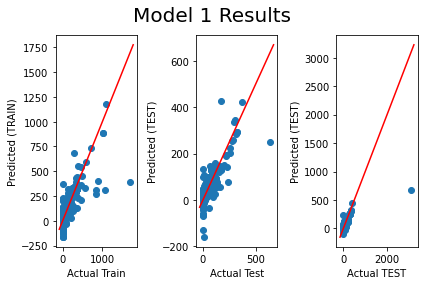

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns



# fig limits


# adding a main title across top
fig.suptitle("Model 1 Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds) 
axes[0].set_xlabel("Actual Train", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds)
axes[1].set_xlabel("Actual Test", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=y_val, y=val_preds)
axes[2].set_xlabel("Actual TEST", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

MODEL 2

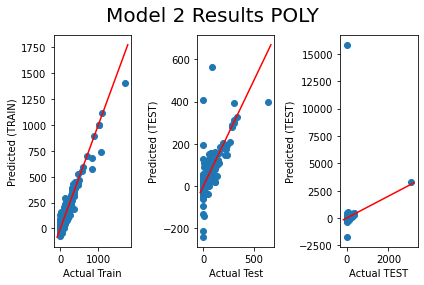

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns



# fig limits


# adding a main title across top
fig.suptitle("Model 2 Results POLY", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_poly, y=train_preds_2 ) 
axes[0].set_xlabel("Actual Train", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test_poly, y=test_preds_2)
axes[1].set_xlabel("Actual Test", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=y_val_poly, y=val_preds_2)
axes[2].set_xlabel("Actual TEST", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

MODEL : 3

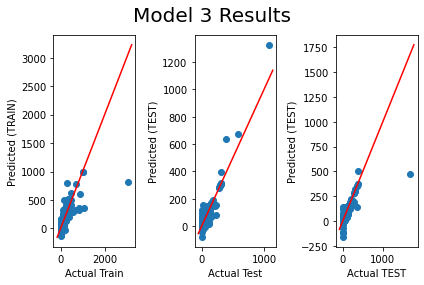

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns



# fig limits


# adding a main title across top
fig.suptitle("Model 3 Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_3, y=train_preds_3 ) 
axes[0].set_xlabel("Actual Train", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test_3 , y=test_preds_3)
axes[1].set_xlabel("Actual Test", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=y_val_3, y=val_preds_3)
axes[2].set_xlabel("Actual TEST", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

MODEL 4:

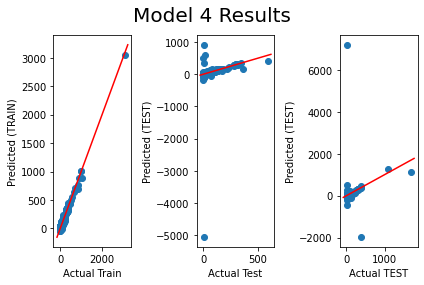

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns



# fig limits


# adding a main title across top
fig.suptitle("Model 4 Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_4, y=train_preds_4 ) 
axes[0].set_xlabel("Actual Train", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test_4 , y=test_preds_4)
axes[1].set_xlabel("Actual Test", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=y_val_4, y=val_preds_4)
axes[2].set_xlabel("Actual TEST", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

Caculating Residual Erros

Mean Absoulte error

Model :1

In [ ]:
# Mean absolute error for training partition
trainMAE = mean_absolute_error(y_train,train_preds)
print("This is trainMAE:", trainMAE)

# Mean absolute error for test partion
testMAE = mean_absolute_error(y_test,test_preds)
print("This is testMAE:", testMAE)

# Mean absolute error for test partion
valMAE = mean_absolute_error(y_val,val_preds)
print("This is testMAE:", testMAE)

This is trainMAE: 15.002214512901267
This is testMAE: 15.461025257492244
This is testMAE: 15.461025257492244


Model :2

In [ ]:
# Mean absolute error for training partition
trainMAE_2 = mean_absolute_error(y_train_poly,train_preds_2)
print("This is trainMAE:", trainMAE_2)

# Mean absolute error for test partion
testMAE_2 = mean_absolute_error(y_test_poly,test_preds_2)
print("This is testMAE:", testMAE_2)

# Mean absolute error for test partion
valMAE_2 = mean_absolute_error(y_val_poly,val_preds_2)
print("This is testMAE:", testMAE_2)

This is trainMAE: 10.507182065910916
This is testMAE: 16.137536847213767
This is testMAE: 16.137536847213767


MODEL :3

In [ ]:
# Mean absolute error for training partition
trainMAE_3 = mean_absolute_error(y_train_3,train_preds_3)
print("This is trainMAE:", trainMAE_3)

# Mean absolute error for test partion
testMAE_3 = mean_absolute_error(y_test_3,test_preds_3)
print("This is testMAE:", testMAE_3)

# Mean absolute error for test partion
valMAE_3 = mean_absolute_error(y_val_3,val_preds_3)
print("This is testMAE:", testMAE_3)

This is trainMAE: 18.123392290914065
This is testMAE: 18.008692437148312
This is testMAE: 18.008692437148312


MODEL :4

In [ ]:
# Mean absolute error for training partition
trainMAE_4 = mean_absolute_error(y_train_4,train_preds_4)
print("This is trainMAE:", trainMAE_4)

# Mean absolute error for test partion
testMAE_4 = mean_absolute_error(y_test_4,test_preds_4)
print("This is testMAE:", testMAE_4)

# Mean absolute error for test partion
valMAE_4 = mean_absolute_error(y_val_4,val_preds_4)
print("This is testMAE:", testMAE_4)

This is trainMAE: 9.616099409878586
This is testMAE: 32.56156383125648
This is testMAE: 32.56156383125648


Root Mean Squared Error

MODEL:1

In [ ]:
# RMSE for error for training partition
Train_rms_1 = mean_squared_error(y_train,train_preds, squared=False)
print("This is trainRMSE:", Train_rms_1)

# RMSE for error for Test partition
Test_rms_1 = mean_squared_error(y_test,test_preds, squared=False)
print("This is testRMSE:", Test_rms_1)

# RMSE for error for vald partition
Val_rms_1 = mean_squared_error(y_val,val_preds, squared=False)
print("This is ValRMSE:", Val_rms_1)

This is trainRMSE: 35.14458371452395
This is testRMSE: 30.257821090579252
This is ValRMSE: 97.97121582622101


MODEL :2

In [ ]:
# RMSE for error for training partition
Train_rms_2 = mean_squared_error(y_train_poly,train_preds_2, squared=False)
print("This is trainRMSE:", Train_rms_2)

# RMSE for error for Test partition
Test_rms_2 = mean_squared_error(y_test_poly,test_preds_2, squared=False)
print("This is testRMSE:", Test_rms_2)

# RMSE for error for vald partition
Val_rms_2 = mean_squared_error(y_val_poly,val_preds_2, squared=False)
print("This is ValRMSE:", Val_rms_2)

This is trainRMSE: 17.638438118652594
This is testRMSE: 37.996719692334246
This is ValRMSE: 632.8987586214712


MODEL:3

In [ ]:
# RMSE for error for training partition
Train_rms_3 = mean_squared_error(y_train_3,train_preds_3, squared=False)
print("This is trainRMSE:", Train_rms_3)

# RMSE for error for Test partition
Test_rms_3 = mean_squared_error(y_test_3,test_preds_3, squared=False)
print("This is testRMSE:", Test_rms_3)

# RMSE for error for vald partition
Val_rms_3 = mean_squared_error(y_val_3,val_preds_3, squared=False)
print("This is ValRMSE:", Val_rms_3)

This is trainRMSE: 51.873266204827296
This is testRMSE: 31.08229721034581
This is ValRMSE: 66.41706697739798


MODEL :4

In [ ]:
# RMSE for error for training partition
Train_rms_4 = mean_squared_error(y_train_4,train_preds_4, squared=False)
print("This is trainRMSE:", Train_rms_4)

# RMSE for error for Test partition
Test_rms_4 = mean_squared_error(y_test_4,test_preds_4, squared=False)
print("This is testRMSE:", Test_rms_4)

# RMSE for error for vald partition
Val_rms_4 = mean_squared_error(y_val_4,val_preds_4, squared=False)
print("This is ValRMSE:", Val_rms_4)

This is trainRMSE: 14.230098518867573
This is testRMSE: 256.1960281999956
This is ValRMSE: 373.59830987724774


**MSE :**

Model 1:

In [ ]:
# MSE for error for training partition
Train_ms_1 = mean_squared_error(y_train,train_preds)
print("This is trainMSE:", Train_ms_1)

# MSE for error for Test partition
Test_ms_1 = mean_squared_error(y_test,test_preds)
print("This is testMSE:", Test_ms_1)

# MSE for error for vald partition
Val_ms_1 = mean_squared_error(y_val,val_preds)
print("This is ValMSE:", Val_ms_1)

This is trainMSE: 1235.141764467182
This is testMSE: 915.5357371495026
This is ValMSE: 9598.35913046798


Model :2

In [ ]:
# MSE for error for training partition
Train_ms_2 = mean_squared_error(y_train_poly,train_preds_2)
print("This is trainMSE:", Train_ms_2)

# MSE for error for Test partition
Test_ms_2 = mean_squared_error(y_test_poly,test_preds_2)
print("This is testMSE:", Test_ms_2)

# MSE for error for vald partition
Val_ms_2 = mean_squared_error(y_val_poly,val_preds_2)
print("This is ValMSE:", Val_ms_2)

This is trainMSE: 311.1144992655369
This is testMSE: 1443.7507073778208
This is ValMSE: 400560.8386645992


MODEL :3

In [ ]:
# MSE for error for training partition
Train_ms_3 = mean_squared_error(y_train_3,train_preds_3)
print("This is trainMSE:", Train_ms_3)

# MSE for error for Test partition
Test_ms_3 = mean_squared_error(y_test_3,test_preds_3)
print("This is testMSE:", Test_ms_3)

# MSE for error for vald partition
Val_ms_3 = mean_squared_error(y_val_3,val_preds_3)
print("This is ValMSE:", Val_ms_3)

This is trainMSE: 2690.8357467568776
This is testMSE: 966.1091998722709
This is ValMSE: 4411.226785880169


MODEL :4

In [ ]:
# MSE for error for training partition
Train_ms_4 = mean_squared_error(y_train_4,train_preds_4)
print("This is trainMSE:", Train_ms_4)

# MSE for error for Test partition
Test_ms_4 = mean_squared_error(y_test_4,test_preds_4)
print("This is testMSE:", Test_ms_4)

# MSE for error for vald partition
Val_ms_4 = mean_squared_error(y_val_4,val_preds_4)
print("This is ValMSE:", Val_ms_4)

This is trainMSE: 202.49570385667707
This is testMSE: 65636.40486545295
This is ValMSE: 139575.69714313603


ADVANCED 

PART 1:

In [ ]:
# Converting our datset to a datframe so we can merge later
X_train = pd.DataFrame (X_train, columns = ['Data.Alpha_Carotene','Data.Beta_Carotene','Data.Beta_Cryptoxanthin','Data.Carbohydrate','Data.Choline','Data.Fiber','Data.Lutein_and_Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin',
                       'Data.Selenium','Data.Sugar_Total','Data.Thiamin','Data.Water','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat','Data.Fat.Saturated_Fat',
                       'Data.Fat.Total_Lipid','Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Phosphorus',
                       'Data.Major_Minerals.Potassium','Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc','Data.Vitamins.Vitamin_A_-_RAE','Data.Vitamins.Vitamin_B12',
                       'Data.Vitamins.Vitamin_B6','Data.Vitamins.Vitamin_C','Data.Vitamins.Vitamin_E','Data.Vitamins.Vitamin_K','Data.Major_Minerals.Magnesium'])

y_train= pd.DataFrame (y_train, columns=['Actual_Values'])

train_preds= pd.DataFrame (train_preds,columns=['Predicted_Values'])


X_test = pd.DataFrame (X_test, columns = ['Data.Alpha_Carotene','Data.Beta_Carotene','Data.Beta_Cryptoxanthin','Data.Carbohydrate','Data.Choline','Data.Fiber','Data.Lutein_and_Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin',
                       'Data.Selenium','Data.Sugar_Total','Data.Thiamin','Data.Water','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat','Data.Fat.Saturated_Fat',
                       'Data.Fat.Total_Lipid','Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Phosphorus',
                       'Data.Major_Minerals.Potassium','Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc','Data.Vitamins.Vitamin_A_-_RAE','Data.Vitamins.Vitamin_B12',
                       'Data.Vitamins.Vitamin_B6','Data.Vitamins.Vitamin_C','Data.Vitamins.Vitamin_E','Data.Vitamins.Vitamin_K','Data.Major_Minerals.Magnesium'])

y_test= pd.DataFrame (y_test, columns=['Actual_Values_1'])

test_preds= pd.DataFrame (test_preds,columns=['Predicted_Values_1'])


X_val = pd.DataFrame (X_val, columns = ['Data.Alpha_Carotene','Data.Beta_Carotene','Data.Beta_Cryptoxanthin','Data.Carbohydrate','Data.Choline','Data.Fiber','Data.Lutein_and_Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin',
                       'Data.Selenium','Data.Sugar_Total','Data.Thiamin','Data.Water','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat','Data.Fat.Saturated_Fat',
                       'Data.Fat.Total_Lipid','Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Phosphorus',
                       'Data.Major_Minerals.Potassium','Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc','Data.Vitamins.Vitamin_A_-_RAE','Data.Vitamins.Vitamin_B12',
                       'Data.Vitamins.Vitamin_B6','Data.Vitamins.Vitamin_C','Data.Vitamins.Vitamin_E','Data.Vitamins.Vitamin_K','Data.Major_Minerals.Magnesium'])

y_val= pd.DataFrame (y_val, columns=['Actual_Values_2'])


val_preds= pd.DataFrame (val_preds,columns=['Predicted_Values_2'])


In [ ]:
# We need this column called category to find erros realted to each category
CAT_train= pd.DataFrame (CAT_train,columns=['Category'])

In [ ]:
train_meta_1 = pd.merge(X_train, y_train,left_index=True,right_index = True )
#train_meta_1 = pd.merge(train_meta_1,y_train,left_index=True,right_index = True )
train_meta_1 = pd.merge(train_meta_1,train_preds,left_index=True,right_index = True )
train_meta_1 = pd.merge(train_meta_1,CAT_train,left_index=True,right_index = True )

In [ ]:
test_meta_1 = pd.merge(X_test, y_test,left_index=True,right_index = True )
#test_meta_1 = pd.merge(test_meta_1,y_test,left_index=True,right_index = True )
test_meta_1 = pd.merge(test_meta_1,test_preds,left_index=True,right_index = True )
test_meta_1 = pd.merge(test_meta_1,CAT_test,left_index=True,right_index = True )

In [ ]:
val_meta_1 = pd.merge(X_val, y_val,left_index=True,right_index = True )
#val_meta_1 = pd.merge(val_meta_1,y_val,left_index=True,right_index = True )
val_meta_1 = pd.merge(val_meta_1,val_preds,left_index=True,right_index = True )
val_meta_1 = pd.merge(val_meta_1,CAT_test,left_index=True,right_index = True )

In [ ]:
# So to check our errors in different groups first i will create a columns which calculates actual and predicted values
train_meta_1['Error'] = train_meta_1['Actual_Values'] -train_meta_1['Predicted_Values']
train_meta_1['Error Square'] = train_meta_1['Error']**2
test_meta_1['Error'] = test_meta_1['Actual_Values_1'] -test_meta_1['Predicted_Values_1']
test_meta_1['Error Square'] = test_meta_1['Error']**2
val_meta_1['Error'] = val_meta_1['Actual_Values_2'] -val_meta_1['Predicted_Values_2']
val_meta_1['Error Square'] = val_meta_1['Error']**2

In [ ]:
# Checking the metadata values:
train_meta_1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3642 entries, 0 to 5099
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data.Alpha_Carotene             3642 non-null   float64
 1   Data.Beta_Carotene              3642 non-null   float64
 2   Data.Beta_Cryptoxanthin         3642 non-null   float64
 3   Data.Carbohydrate               3642 non-null   float64
 4   Data.Choline                    3642 non-null   float64
 5   Data.Fiber                      3642 non-null   float64
 6   Data.Lutein_and_Zeaxanthin      3642 non-null   float64
 7   Data.Lycopene                   3642 non-null   float64
 8   Data.Niacin                     3642 non-null   float64
 9   Data.Protein                    3642 non-null   float64
 10  Data.Retinol                    3642 non-null   float64
 11  Data.Riboflavin                 3642 non-null   float64
 12  Data.Selenium                   36

In [ ]:
test_meta_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 16 to 627
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data.Alpha_Carotene             57 non-null     float64
 1   Data.Beta_Carotene              57 non-null     float64
 2   Data.Beta_Cryptoxanthin         57 non-null     float64
 3   Data.Carbohydrate               57 non-null     float64
 4   Data.Choline                    57 non-null     float64
 5   Data.Fiber                      57 non-null     float64
 6   Data.Lutein_and_Zeaxanthin      57 non-null     float64
 7   Data.Lycopene                   57 non-null     float64
 8   Data.Niacin                     57 non-null     float64
 9   Data.Protein                    57 non-null     float64
 10  Data.Retinol                    57 non-null     float64
 11  Data.Riboflavin                 57 non-null     float64
 12  Data.Selenium                   57 n

In [ ]:
val_meta_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 16 to 627
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data.Alpha_Carotene             57 non-null     float64
 1   Data.Beta_Carotene              57 non-null     float64
 2   Data.Beta_Cryptoxanthin         57 non-null     float64
 3   Data.Carbohydrate               57 non-null     float64
 4   Data.Choline                    57 non-null     float64
 5   Data.Fiber                      57 non-null     float64
 6   Data.Lutein_and_Zeaxanthin      57 non-null     float64
 7   Data.Lycopene                   57 non-null     float64
 8   Data.Niacin                     57 non-null     float64
 9   Data.Protein                    57 non-null     float64
 10  Data.Retinol                    57 non-null     float64
 11  Data.Riboflavin                 57 non-null     float64
 12  Data.Selenium                   57 n

In [ ]:
# To calculate the errors in differnt category for Training 
Train_category_results= train_meta_1.groupby("Category")["Error Square"].mean()
Train_category_results

Category
Abalone                                3170.927399
Adobo                                    75.859329
Air filled fritter or fried puff          1.078274
Alfredo sauce                             3.518251
Alfredo sauce with added vegetables    1124.137201
                                          ...     
Wrap sandwich                            18.041040
Yat Ga Mein with meat                    81.377826
Yellow rice                             322.680968
Yogurt                                  185.047585
Yogurt parfait                            2.580063
Name: Error Square, Length: 1271, dtype: float64

In [ ]:
# To calculate the errors in differnt category for Test Partion
Test_category_results =test_meta_1.groupby("Category")["Error Square"].mean()
Test_category_results

Category
Buttermilk                     9.297092
Cheese                        93.649429
Cheese sandwich               38.062948
Chipotle dip                  21.113974
Chocolate milk               301.734963
Coffee creamer               173.803285
Cottage cheese                87.966834
Creme brulee                  38.006130
Dill dip                     966.664719
Eggnog                       615.757604
Grilled cheese sandwich      183.420543
Hot chocolate / Cocoa        307.200310
Infant formula               462.681768
Light ice cream                4.135974
Milk                           2.667924
Milk shake                     7.263001
Pudding                       57.131155
Sherbet                      380.966433
Sour cream                    24.101875
Soy milk                      76.815995
Spinach and artichoke dip      2.038537
Topping from meat pizza      185.609610
Yogurt                       206.655951
Name: Error Square, dtype: float64

In [ ]:
# To calculate the errors in differnt category for validation
Val_category_results =val_meta_1.groupby("Category")["Error Square"].mean()
Val_category_results

Category
Buttermilk                    203.549850
Cheese                        184.059693
Cheese sandwich               363.975723
Chipotle dip                 2036.250457
Chocolate milk                 73.673394
Coffee creamer               1798.488972
Cottage cheese                140.676952
Creme brulee                  948.952788
Dill dip                       17.670370
Eggnog                          3.299241
Grilled cheese sandwich       339.450222
Hot chocolate / Cocoa           0.884765
Infant formula                516.263852
Light ice cream                44.702664
Milk                          102.633689
Milk shake                     52.948799
Pudding                       509.831422
Sherbet                        31.683552
Sour cream                   6567.889019
Soy milk                       73.533725
Spinach and artichoke dip    2760.211153
Topping from meat pizza        11.595170
Yogurt                        160.151523
Name: Error Square, dtype: float64

So seeing these results we can conclude that the below categories has huge errors

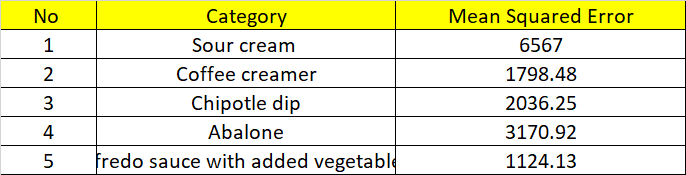

To Check for Overestimation or Under estimation i will compare the results of Training ,validation and Testing 

Catgories Sour cream,Coffee creamer & Chipotlete dip tend to be overestimated as it has huge error in validation datset so it has variance and low bias

categories Such as Abalone,Afredo Sauce with added vegetables have more errro in training dataset so these are underestimated in training datset which have high bias.


PART :2

Categories where our model is predicting negative values 

In [ ]:
# To check values where our model is predicting negative values
train_meta_1_neg=train_meta_1[train_meta_1['Predicted_Values'] < 0]
# TotalNumber of categories
train_meta_1['Category'].nunique()

1271

In [ ]:
# Categories where model is predicting negative values
train_meta_1_neg['Category'].unique()

array(['Milk', 'Buttermilk', "Goat's milk", 'Soy milk', 'Almond milk',
       'Rice milk', 'Yogurt', 'Vegetable dip', 'Frozen yogurt',
       'Frozen yogurt bar', 'Frozen yogurt cone', 'Hot chocolate / Cocoa',
       'Chocolate milk', 'Strawberry milk', 'Milk shake',
       'Licuado or Batido', 'Infant formula', 'Cream', 'Coffee creamer',
       'Sour cream', 'Chipotle dip', 'Dill dip', 'Spinach dip',
       'Ice cream', 'Gelato', 'Ice cream candy bar', 'Ice cream cone',
       'Ice cream soda', 'Ice cream sundae', 'Banana split',
       'Light ice cream bar', 'Creamsicle', 'Light ice cream cone',
       'Flan', 'Banana pudding', 'Tiramisu', 'Cheese', 'Welsh rarebit',
       'Cheese sandwich', 'Grilled cheese sandwich', 'Alfredo sauce',
       'Cheddar cheese soup', 'Steak', 'Beef steak', 'Beef',
       'Beef brisket', 'Ground beef', 'Pork', 'Pork chop',
       'Pork steak or cutlet', 'Ham', 'Pork roast', 'Lamb', 'Veal',
       'Veal chop', 'Veal cutlet or steak', 'Venison/deer', 'Cari

In [ ]:
# Number of categories which have negative predictions
train_meta_1_neg['Category'].nunique()

413

# Modeling (Classification) (10 pts)
Use subheaders to keep your notebook really organized! 

I'd like you to also practice your classification modeling skills. Any regression problem can turn into a classification problem if you recode the target variable. 

Calculate the median cholesterol and build classification models to predict below or equal to (y=0) or greater than (y=1) the median cholesterol value from the other nutrition variables? Use the entire dataset (don't drop any rows where cholesterol == 0, these will be helpful!)

* Model4: Fit a very basic logistic regression model (vanilla)
* Model5: Show off! Use all of your pre-processing and advanced modeling techniques to build an amazing model. You can use the same features from Model 2 if you want to.

# Model 4:

In [ ]:
# Value of the median cholesterol level :
df_shuff['Data.Cholesterol'].median()

9.0

In [ ]:
# Classification model to predict below or equal to (y=0) or greater than (y=1) the median cholesterol value
# the continous data set is converted to binary. Cholesterol level less than median value is considered as 0 and greater than median value is considered 1
df_shuff['Data.Cholesterol'] = np.where(df_shuff['Data.Cholesterol'] > df_shuff['Data.Cholesterol'].median(),
                                                                                                       1,
                                                                                                       0)

df_shuff['Data.Cholesterol'].head()

4974    0
4635    1
2611    1
1900    1
1176    1
Name: Data.Cholesterol, dtype: int64

In [ ]:
# Check the data set after binary conversion for the column Cholesterol:
df_shuff['Data.Cholesterol']

4974    0
4635    1
2611    1
1900    1
1176    1
       ..
2766    1
3920    0
5526    1
5560    0
6578    1
Name: Data.Cholesterol, Length: 6375, dtype: int64

In [ ]:
# Except, Cholesterol, Rest all variables are used to create subset X
X=df_shuff[['Data.Alpha_Carotene','Data.Beta_Carotene','Data.Beta_Cryptoxanthin','Data.Carbohydrate','Data.Choline','Data.Fiber','Data.Lutein_and_Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin',
                       'Data.Selenium','Data.Sugar_Total','Data.Thiamin','Data.Water','Data.Fat.Monosaturated_Fat','Data.Fat.Polysaturated_Fat','Data.Fat.Saturated_Fat',
                       'Data.Fat.Total_Lipid','Data.Major_Minerals.Calcium','Data.Major_Minerals.Copper','Data.Major_Minerals.Iron','Data.Major_Minerals.Phosphorus',
                       'Data.Major_Minerals.Potassium','Data.Major_Minerals.Sodium','Data.Major_Minerals.Zinc','Data.Vitamins.Vitamin_A_-_RAE','Data.Vitamins.Vitamin_B12',
                       'Data.Vitamins.Vitamin_B6','Data.Vitamins.Vitamin_C','Data.Vitamins.Vitamin_E','Data.Vitamins.Vitamin_K','Data.Major_Minerals.Magnesium']]
# Target variable is Y, which is Cholesterol
Y=df_shuff['Data.Cholesterol']
X = np.array(X)
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 18) # Split the data in Train and test data set

# Use the same function above for the validation set 50/50
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
    test_size=0.5, random_state= 18)

In [ ]:
# Convert all the data sets into Numpy Arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:

# Use MinMaxScaler() function to shrink the data in the range between 0 and 1
scaler = MinMaxScaler()
# Transform the data sets into Fit_Transformation
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
# Logistic Regression (Model 4)
LR = LogisticRegression() 
LR = LR.fit(X_train, y_train) # Fit the model
train_preds_LR = LR.predict(X_train)
test_preds_LR= LR.predict(X_test)
val_preds_LR =LR.predict(X_val)

# Calculate the accuracy of the data sets in the model:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier on Validation set: {:.2f}'
     .format(LR.score(X_val, y_val)))

Accuracy of Logistic regression classifier on training set: 0.87
Accuracy of Logistic regression classifier on test set: 0.87
Accuracy of Logistic regression classifier on Validation set: 0.87


Model 5

In [ ]:
# Use Polynomialfeatures for Model 5
polynomial = PolynomialFeatures(2)
X_train = polynomial.fit_transform(X_train)
X_test= polynomial.transform(X_test)
X_val= polynomial.transform(X_val)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
RFC = RandomForestClassifier() # Using Logistic Regression for y
RFC = RFC.fit(X_train, y_train) # Fit the Model
train_preds_RFC = RFC.predict(X_train) #  y_train
test_preds_RFC = RFC.predict(X_test)
val_preds_RFC =RFC.predict(X_val)

# Calculate the accuracy of the data sets in the model:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(RFC.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(RFC.score(X_test, y_test)))
print('Accuracy of Random Forest classifier on Validation set: {:.2f}'
     .format(RFC.score(X_val, y_val)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.99
Accuracy of Random Forest classifier on Validation set: 0.97


# Analyze and interpret classification errors (10 pts)
Use subheaders to keep your notebook really organized!

We will just do a basic analysis on the classification models.

For each model...
* Create a confusion matrix for the train, val and test partitions
* Create a classification report for the train, val and test partitions

Discuss the concepts of TP, TN, FP, FN and precision, recall and F-1 score. How does your model do? You should have at least 5 detailed bullet points here. Is your model better at predicting 0s or 1s? How does this affect how your model might be used by a nutritionist?

**Optional:** Though not required, you are welcome to dig deeper into which records were misclassified and what they have in common. You may get bonus points if you do something awesome here.

# TP, TN, FP, FN and precision, recall and F-1 score:


*   True Positive (TP) — model correctly predicts the positive class (prediction and actual both are positive). 
*   True Negative (TN) — model correctly predicts the negative class (prediction and actual both are negative).
*   False Positive (FP) — model gives the wrong prediction of the negative class (predicted-positive, actual-negative). FP is also called a TYPE I error.
*   False Negative (FN) — model wrongly predicts the positive class (predicted-negative, actual-positive). FN is also called a TYPE II error.
*   Precision - Out of all the positive predicted, what percentage is truly positive.(TP/(TP+FP))
*   Recall - Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).(TP/(TP+FN))
*   F1 Score - It is the harmonic mean of precision and recall. It takes both false positive and false negatives into account. Therefore, it performs well on an imbalanced dataset. (2* Precision* Recall)/(Precision + Recall)













# Confusion Matrix for the train, val and test partitions:

In [ ]:
# store the general model
LR = LogisticRegression() # use logistic for a classification problem
LR = LR.fit(X_train, y_train) # always going to be (X_train, y_train)

In [ ]:
# train results
train_Results = classification_report(y_train, train_preds_LR) # (actual, predicted)
print(train_Results) # Print the result

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2604
           1       0.93      0.79      0.86      2496

    accuracy                           0.87      5100
   macro avg       0.88      0.87      0.87      5100
weighted avg       0.88      0.87      0.87      5100



In [ ]:
#Show the Confusion Matrix Value
z = confusion_matrix(y_train, train_preds_LR)
print(z)

[[2453  151]
 [ 517 1979]]


In [ ]:
# extract TP, TN, FP, FN from the data set
tn, fp, fn, tp = confusion_matrix(y_train, train_preds_LR).ravel()
(tn, fp, fn, tp)

(2453, 151, 517, 1979)

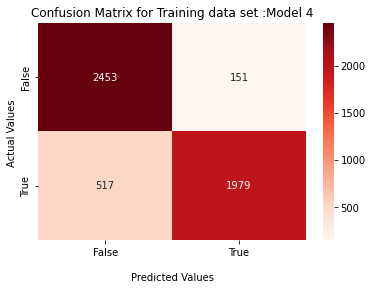

In [ ]:
ax = sns.heatmap(z, fmt='', cmap='Reds',annot = True)
ax.set_title('Confusion Matrix for Training data set :Model 4');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Put the List must in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Show the visualization of the Confusion Matrix.
plt.show()

## MAE, RMSE and MSE Value for training data in Model 4

In [ ]:
# Mean absolute error for training partition
train_MAE = mean_absolute_error(y_train,train_preds_LR)
print("This is trainMAE:", train_MAE)
# RMSE for error for training partition
Train_rms = mean_squared_error(y_train,train_preds_LR, squared=False)
print("This is trainRMSE:", Train_rms)
# MSE for error for training partition
Train_MSE = mean_squared_error(y_train,train_preds_LR)
print("This is trainMSE:", Train_MSE)

This is trainMAE: 0.13098039215686275
This is trainRMSE: 0.36191213319929294
This is trainMSE: 0.13098039215686275


In [ ]:
# Classification Report for Test Data
Test_Results = classification_report(y_test, test_preds_LR) # (actual, predicted)
print(Test_Results)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       312
           1       0.94      0.80      0.86       325

    accuracy                           0.87       637
   macro avg       0.88      0.87      0.87       637
weighted avg       0.88      0.87      0.87       637



In [ ]:
#Show the Confusion Matrix Value
p = confusion_matrix(y_test, test_preds_LR)
print(p)

[[294  18]
 [ 64 261]]


In [ ]:
# extract TP, TN, FP, FN from the data set
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(294, 18, 64, 261)

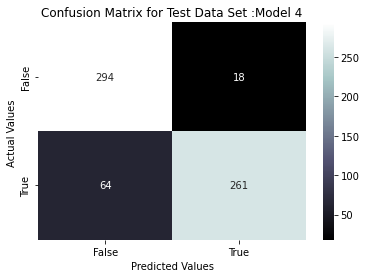

In [ ]:
#Build visualization Model:
ax = sns.heatmap(p, fmt='', cmap='bone',annot = True)
ax.set_title('Confusion Matrix for Test Data Set :Model 4');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Put the List must in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Show the visualization of the Confusion Matrix.
plt.show()

## MAE, RMSE and MSE Value for test data in Model 4

In [ ]:
# Mean absolute error for test partion
test_MAE = mean_absolute_error(y_test,test_preds_LR)
print("This is testMAE:", test_MAE)
# RMSE for error for Test partition
Test_rms = mean_squared_error(y_test,test_preds_LR, squared=False)
print("This is testRMSE:", Test_rms)
# MSE for error for Test partition
Test_MSE = mean_squared_error(y_test,test_preds_LR)
print("This is testMSE:", Test_MSE)




This is testMAE: 0.12872841444270017
This is testRMSE: 0.35878742235856065
This is testMSE: 0.12872841444270017


In [ ]:
# Classification Report for Validation Data
Val_Results = classification_report(y_val, val_preds_LR) # (actual, predicted)
print(Val_Results)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       314
           1       0.93      0.81      0.86       324

    accuracy                           0.87       638
   macro avg       0.88      0.87      0.87       638
weighted avg       0.88      0.87      0.87       638



In [ ]:
#Show the Confusion Matrix Value
q = confusion_matrix(y_val, val_preds_LR)
print(q)

[[294  20]
 [ 63 261]]


In [ ]:
# extract TP, TN, FP, FN from the data set
tn, fp, fn, tp = confusion_matrix(y_val, val_preds_LR).ravel()
(tn, fp, fn, tp)

(294, 20, 63, 261)

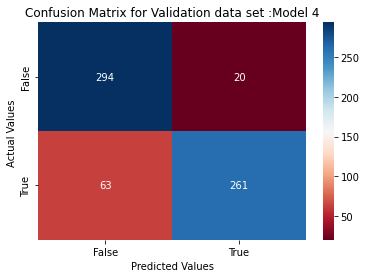

In [ ]:
#Build visualization Model
ax = sns.heatmap(q, fmt='', cmap='RdBu',annot = True)
ax.set_title('Confusion Matrix for Validation data set :Model 4');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Put the List in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## MAE, RMSE and MSE Value for Validation data in Model 4

In [ ]:
# Mean absolute error for Val partion
val_MAE = mean_absolute_error(y_val,val_preds_LR)
print("This is ValMAE:", val_MAE)
# RMSE for error for val partition
Val_rms = mean_squared_error(y_val,val_preds_LR, squared=False)
print("This is ValRMSE:", Val_rms)
# MSE for error for vald partition
Val_MSE = mean_squared_error(y_val,val_preds)
print("This is ValMSE:", Val_MSE)

This is ValMAE: 0.13009404388714735
This is ValRMSE: 0.3606855193754628
This is ValMSE: 4780.507985863421


# Model 5:

In [ ]:
# store the general model
RFC = RandomForestClassifier() # Using Logistic Regression
RFC = RFC.fit(X_train, y_train) 

In [ ]:
# Classification reports for train results
train_Results = classification_report(y_train, train_preds_RFC) # (actual, predicted)
print(train_Results)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2604
           1       1.00      1.00      1.00      2496

    accuracy                           1.00      5100
   macro avg       1.00      1.00      1.00      5100
weighted avg       1.00      1.00      1.00      5100



In [ ]:
#Show the Confusion Matrix Value
j = confusion_matrix(y_train, train_preds_RFC)
print(j)

[[2604    0]
 [   0 2496]]


In [ ]:
# Extract TP, TN, FP, FN from the data set
tn, fp, fn, tp = confusion_matrix(y_train, train_preds_RFC).ravel()
(tn, fp, fn, tp)

(2604, 0, 0, 2496)

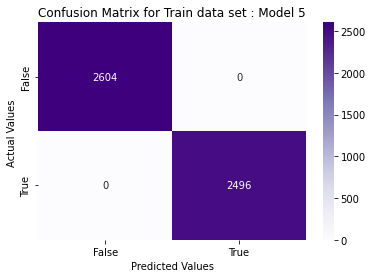

In [ ]:
ax = sns.heatmap(j, fmt='', cmap='Purples',annot = True)
ax.set_title('Confusion Matrix for Train data set : Model 5');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

# Put the List must in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## MAE, RMSE and MSE Value for Train data in Model 5

In [ ]:
# Mean absolute error for training partition
train_MAE = mean_absolute_error(y_train,train_preds_RFC)
print("This is trainMAE:", train_MAE)
# RMSE for error for training partition
Train_rms = mean_squared_error(y_train,train_preds_RFC, squared=False)
print("This is trainRMSE:", Train_rms)
# MSE for error for training partition
Train_MSE = mean_squared_error(y_train,train_preds_RFC)
print("This is trainMSE:", Train_MSE)

This is trainMAE: 0.0
This is trainRMSE: 0.0
This is trainMSE: 0.0


In [ ]:
# Classification Report for Test Data
Test_Results = classification_report(y_test, test_preds_RFC) # (actual, predicted)
print(Test_Results)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       312
           1       0.99      0.98      0.99       325

    accuracy                           0.99       637
   macro avg       0.99      0.99      0.99       637
weighted avg       0.99      0.99      0.99       637



In [ ]:
#Show the Confusion Matrix Value
r = confusion_matrix(y_test, test_preds_RFC)
print(r)

[[308   4]
 [  5 320]]


In [ ]:
# Extract TP, TN, FP, FN from the data set
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_RFC).ravel()
(tn, fp, fn, tp)

(308, 4, 5, 320)

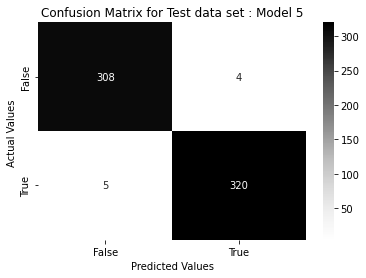

In [ ]:
ax = sns.heatmap(r, fmt='', cmap='Greys',annot = True)
ax.set_title('Confusion Matrix for Test data set : Model 5');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

# Put the List must in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## MAE, RMSE and MSE Value for Test data in Model 5

In [ ]:
# Mean absolute error for test partion
test_MAE = mean_absolute_error(y_test,test_preds_RFC)
print("This is testMAE:", test_MAE)
# RMSE for error for Test partition
Test_rms = mean_squared_error(y_test,test_preds_RFC, squared=False)
print("This is testRMSE:", Test_rms)
# MSE for error for Test partition
Test_MSE = mean_squared_error(y_test,test_preds_RFC)
print("This is testMSE:", Test_MSE)

This is testMAE: 0.0141287284144427
This is testRMSE: 0.1188643277625491
This is testMSE: 0.0141287284144427


In [ ]:
# Classification Report for Validation Data
Val_Results = classification_report(y_val, val_preds_RFC ) # (actual, predicted)
print(Val_Results)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       314
           1       0.96      0.98      0.97       324

    accuracy                           0.97       638
   macro avg       0.97      0.97      0.97       638
weighted avg       0.97      0.97      0.97       638



In [ ]:
#Show the Confusion Matrix Value
t = confusion_matrix(y_val, val_preds_RFC)
print(t)

[[300  14]
 [  6 318]]


In [ ]:
# Extract TP, TN, FP, FN from the data set
tn, fp, fn, tp = confusion_matrix(y_val, val_preds_RFC).ravel()
(tn, fp, fn, tp)

(300, 14, 6, 318)

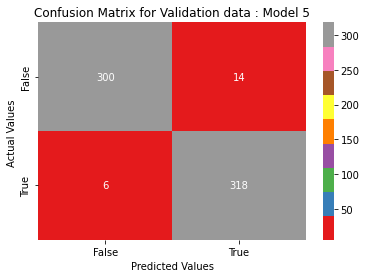

In [ ]:
ax = sns.heatmap(t, fmt='', cmap='Set1',annot = True)
ax.set_title('Confusion Matrix for Validation data : Model 5');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Put the List must in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## MAE, RMSE and MSE Value for Validation data in Model 5

In [ ]:
# Mean absolute error for Val partion
val_MAE = mean_absolute_error(y_val,val_preds_RFC)
print("This is ValMAE:", val_MAE)
# RMSE for error for val partition
Val_rms = mean_squared_error(y_val,val_preds_RFC, squared=False)
print("This is ValRMSE:", Val_rms)
# MSE for error for vald partition
Val_MSE = mean_squared_error(y_val,val_preds_RFC)
print("This is ValMSE:", Val_MSE)

This is ValMAE: 0.03134796238244514
This is ValRMSE: 0.17705355794912775
This is ValMSE: 0.03134796238244514


# Model Evaluation:


*   Target variable 'Cholesterol is conversted into binary that means any value less than median is considered as '0' and more than median is considered as '1'
*   Model 4 has accuracy 0.87 for training, test, validation data set, which means the data is neither underfitting nor overfitting
*   Model 5 train data set accuracy is 1.00, test data set accuracy is 0.98 and validation data set accuracy is 0.97. As the values are more than 0.95, it can be said that the model is overfitting. So this is not the right model to consider for prediction
*   the precision value of 0 is less than the precision value of '1' for all the three data sets in Model 4. That means prediction for 1 is more accurate than 0
*   Recall value of 0 is more than 1 for all the data sets. Which means out of all the sample total number sample is true
*   From this model it can be said that the model is good at predicting the values more than median , that means 1.
*   F1 score shows out of Recall and Precision, which one perform better. In model 4 it can be said that 0's has high score compared to 1s. But as the values are quite similar. So while taking the consideration we can look for precision .

Looking at the model, the doctor can predict cholesterol values ore accurately for the patients , who have cholesterol level more than median and prescribe medicines accordingly






# Conclusion (2.5 pts)
What did you find at the end of all of your analysis and modeling? Summarize your efforts and major findings. Suggest how you might be able to expand on this research in future projects. 


* NetCarbs are driven by Carbohydrates and mainly higher in Sugar related products

*   Advanced EDA Table 1: Subsetting the food category " Infant formula" and exploring to see the nutritional value of infant formulas, we discovered typically, infant formulas contain the needed nutrients for a baby's development. With emphasies placed on the 75 percentile which is characteristics of what can be concluded for the whole infant formula in the dataset
*   Advanced EDA Table 2: As expected, the food categories returned from this exploration are only from animal sources given their high Cholesterol content (confirmed by citation 1). While they are good keto sources due to low carb, they might be a reasonably high source of cholesterol. These are also part of the list of food stated in citation 6
*   Advanced EDA Plot 1: Typically, cholesterol content in egg is higher than in infant formula. Also, a high protein content in egg shows some correlation with cholesterol. Some dietrician help will be needed for what age a baby can be introduced to eggs, and in what quantity

*   Linear Regression: In Linear regression we built 4 different models two by considering the polynomal functions and two without that which are comparively simple model.We have caculated the errors of these models using RMSE,MSE and Mean Absoulte error and shown the correlation between actual and predicted using scatterplots.So finally after caculating the errors metrics we got to know our first model Vanilla Model is the best model as it has the least error MAE of 15 and the error values are consistent across validation and test data set .Where as other Models with Polynomial functions which has 600 plus columns shows a greater difference in error between training, validation and test datset.So we would recomend to use simple vanilla model.In future if there is a possibilty we can reduce the features as long as we can achive similar level of accuracy.Also while performing advanced analysis on linear regression results we found that we few categories within our model has been overestimated and few underestimated.So to fit /capture local patters we can try other models such as KNN or Naive Baysed models in the future.
*   Logistic Regression:
In Logistic Regression, we created two model. First model is logistic Regression with accuracy in train, test and validation data set 0.87. Second Model is Randomforest with accuracy of Train data set as 1.0 , Test data set as 0.97 and Val data set as .98. As the accuracy is more than .95, there can be a chances of overfitting of data in the model. So in this case the best model to consider will be ' Logistic Regression' Model 

**Future Projects**

Our Citation 3 tell that XGBoost and Random Forests give more accuracy so for future projects we can build these models. And we see from the data that some categories are overfit and some categories are underfit. So to avoid this we can also use KNN and Naive bayes model to capture local behaviour.




